<a href="https://colab.research.google.com/github/nidhi-005/Obesity_Levels_Team18/blob/main/Team18_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team 18: Obesity Level Classification and Clustering Analysis**

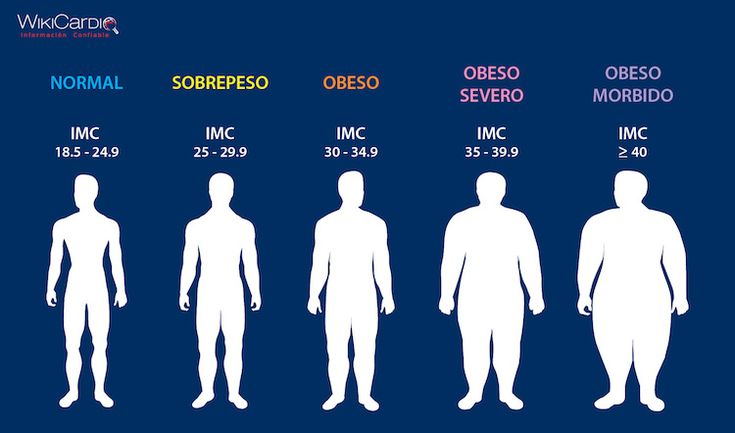

#Dataset Loading

In [ ]:
#Data Preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ankitkhushwaha/BFI_Classification/main/Dataset.csv")
# df = pd.read_csv('Dataset.csv')

In [ ]:
dff = df.copy()

# Dataset First View

In [ ]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [ ]:
df.tail()

Gender        Age    Height      Weight family_history_with_overweight  \
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
2106  yes   3.0  3.0  Sometimes    no  1.728139  no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130  no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193  no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339  no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513  no  1.026452  0.714137   

           CALC                 MTRANS        NObeyesdad  
2106  Sometimes  Public_Transportation  Obesity_Type_III  
2107  Sometimes  Public_Transportation  Obesity_Type_III  
2108  Sometimes  Public_Transportation  Obesity_Type_III  
2109  Sometimes  Public_Transportation  Obesity_Type_III  
2110  Sometimes  Public_Transportation  Obesity_Type_III

# Dataset Overview

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Feature Descriptions: id: Unique identifier for each individual.

**Gender**: Gender of the individual (Male/Female).

**Age**: Age of the individual.

**Height**: Height of the individual in meters.

**Weight**: Weight of the individual in kilograms.

**family_history_with_overweight**: Whether the individual has a family history of overweight (yes/no).

**FAVC**: Frequency of consuming high-caloric food (categorical: yes/no).

**FCVC**: Frequency of consuming vegetables (numeric).

**NCP**: Number of main meals per day (numeric).

**CAEC**: Consumption of food between meals (categorical: no/sometimes/frequently/always).

**SMOKE**: Whether the individual smokes (yes/no).

**CH2O**: Daily water consumption in liters (numeric).

**SCC**: Calories consumption monitoring (categorical: no/sometimes/frequently/always).

**FAF**: Physical activity frequency (numeric).

**TUE**: Time using technology devices (numeric).

**CALC**: Consumption of alcohol (categorical: no/sometimes/frequently/always).

**MTRANS**: Mode of transportation (categorical: automobile/bike/motorbike/public transportation/walking).

**NObeyesdad**: Obesity level classification (target variable).

Note: The target variable is "NObeyesdad," representing the obesity level of the individual, categorized into different levels such as Normal_Weight, Overweight_Level_II, Insufficient_Weight, Obesity_Type_III, etc.



In [ ]:
df.shape

(2111, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**The dataset contain the 2111 rows and 17 columns.** <br>


In [ ]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [ ]:
dff.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

## Categorical Data and Numerical Data

In [ ]:
categorical_data = [i for i in df.columns if df[i].nunique()<=7]
categorical_data

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
numerical_data = [i for i in df.columns if i not in categorical_data]
numerical_data

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

### Results

**Dataset has 9 Categorical and 8 Numerical columns**

# Exploratory Data Analysis( EDA )
## Check Duplicate and Missing Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(24)

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending = False)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

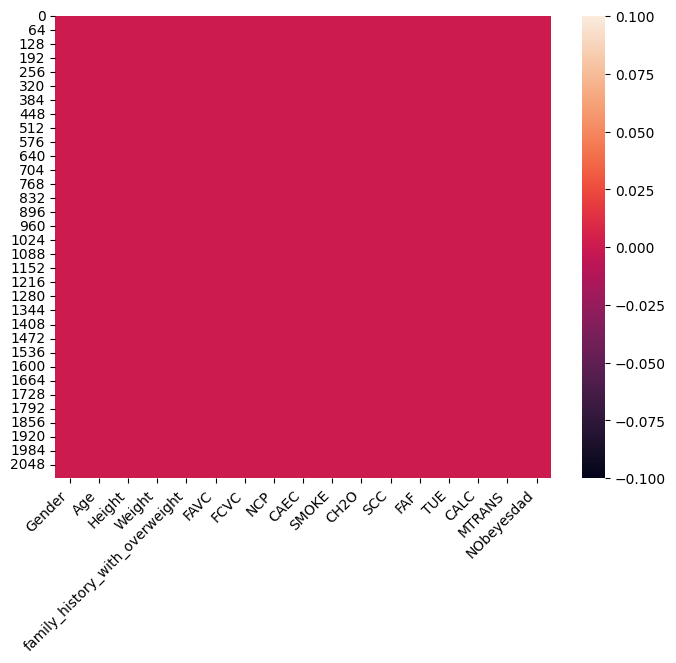

In [ ]:
# Visualizing the missing values
fig = plt.figure(figsize=(8, 6))
# sns.heatmap(df.isnull(),cbar=True) #No missing values
ax = sns.heatmap(df.isnull(), cbar=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Data Quality Check: Duplicate and Missing Values  
**The dataset contains 24 duplicate rows and no missing values in any column.**

### Understanding Variables

In [ ]:
# Dataset Columns
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

count       mean        std    min        25%        50%         75%  \
Age     2111.0  24.312600   6.345968  14.00  19.947192  22.777890   26.000000   
Height  2111.0   1.701677   0.093305   1.45   1.630000   1.700499    1.768464   
Weight  2111.0  86.586058  26.191172  39.00  65.473343  83.000000  107.430682   
FCVC    2111.0   2.419043   0.533927   1.00   2.000000   2.385502    3.000000   
NCP     2111.0   2.685628   0.778039   1.00   2.658738   3.000000    3.000000   
CH2O    2111.0   2.008011   0.612953   1.00   1.584812   2.000000    2.477420   
FAF     2111.0   1.010298   0.850592   0.00   0.124505   1.000000    1.666678   
TUE     2111.0   0.657866   0.608927   0.00   0.000000   0.625350    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00

In [ ]:
df.describe(include = 'all').T

count unique                    top  freq  \
Gender                            2111      2                   Male  1068   
Age                             2111.0    NaN                    NaN   NaN   
Height                          2111.0    NaN                    NaN   NaN   
Weight                          2111.0    NaN                    NaN   NaN   
family_history_with_overweight    2111      2                    yes  1726   
FAVC                              2111      2                    yes  1866   
FCVC                            2111.0    NaN                    NaN   NaN   
NCP                             2111.0    NaN                    NaN   NaN   
CAEC                              2111      4              Sometimes  1765   
SMOKE                             2111      2                     no  2067   
CH2O                            2111.0    NaN                    NaN   NaN   
SCC                               2111      2                     no  2015   
FAF                             2111.0    NaN                    NaN   NaN   
TUE                             2111.0    NaN                    NaN   NaN   
CALC                              2111      4              Sometimes  1401   
MTRANS                            2111      5  Public_Transportation  1580   
NObeyesdad                        2111      7         Obesity_Type_I   351   

                                     mean        std   min        25%  \
Gender                                NaN        NaN   NaN        NaN   
Age                               24.3126   6.345968  14.0  19.947192   
Height                           1.701677   0.093305  1.45       1.63   
Weight                          86.586058  26.191172  39.0  65.473343   
family_history_with_overweight        NaN        NaN   NaN        NaN   
FAVC                                  NaN        NaN   NaN        NaN   
FCVC                             2.419043   0.533927   1.0        2.0   
NCP                              2.685628   0.778039   1.0   2.658738   
CAEC                                  NaN        NaN   NaN        NaN   
SMOKE                                 NaN        NaN   NaN        NaN   
CH2O                             2.008011   0.612953   1.0   1.584812   
SCC                                   NaN        NaN   NaN        NaN   
FAF                              1.010298   0.850592   0.0   0.124505   
TUE                              0.657866   0.608927   0.0        0.0   
CALC                                  NaN        NaN   NaN        NaN   
MTRANS                                NaN        NaN   NaN        NaN   
NObeyesdad                            NaN        NaN   NaN        NaN   

                                     50%         75%    max  
Gender                               NaN         NaN    NaN  
Age                             22.77789        26.0   61.0  
Height                          1.700499    1.768464   1.98  
Weight                              83.0  107.430682  173.0  
family_history_with_overweight       NaN         NaN    NaN  
FAVC                                 NaN         NaN    NaN  
FCVC                            2.385502         3.0    3.0  
NCP                                  3.0         3.0    4.0  
CAEC                                 NaN         NaN    NaN  
SMOKE                                NaN         NaN    NaN  
CH2O                                 2.0     2.47742    3.0  
SCC                                  NaN         NaN    NaN  
FAF                                  1.0    1.666678    3.0  
TUE                              0.62535         1.0    2.0  
CALC                                 NaN         NaN    NaN  
MTRANS                               NaN         NaN    NaN  
NObeyesdad                           NaN         NaN    NaN

### Check unique values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  unique_val = df[i].nunique()
  print("Number of unique values in ",i,"is",unique_val)

Number of unique values in  Gender is 2
Number of unique values in  Age is 1402
Number of unique values in  Height is 1574
Number of unique values in  Weight is 1525
Number of unique values in  family_history_with_overweight is 2
Number of unique values in  FAVC is 2
Number of unique values in  FCVC is 810
Number of unique values in  NCP is 635
Number of unique values in  CAEC is 4
Number of unique values in  SMOKE is 2
Number of unique values in  CH2O is 1268
Number of unique values in  SCC is 2
Number of unique values in  FAF is 1190
Number of unique values in  TUE is 1129
Number of unique values in  CALC is 4
Number of unique values in  MTRANS is 5
Number of unique values in  NObeyesdad is 7


### Values for Categorical Data

In [ ]:
for col in categorical_data:
    print(f"Unique Values of {col}:\n", df[col].unique(), '\n')

Unique Values of Gender:
 ['Female' 'Male'] 

Unique Values of family_history_with_overweight:
 ['yes' 'no'] 

Unique Values of FAVC:
 ['no' 'yes'] 

Unique Values of CAEC:
 ['Sometimes' 'Frequently' 'Always' 'no'] 

Unique Values of SMOKE:
 ['no' 'yes'] 

Unique Values of SCC:
 ['no' 'yes'] 

Unique Values of CALC:
 ['no' 'Sometimes' 'Frequently' 'Always'] 

Unique Values of MTRANS:
 ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike'] 

Unique Values of NObeyesdad:
 ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III'] 



## Transforming the Categorical Data

In [ ]:
# Encode categorical variables
binary_cols = ["Gender", "family_history_with_overweight", "FAVC", "SCC", "SMOKE"]
df_encoded = df.copy()
for col in binary_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


#### Binary Columns after Transformation

In [ ]:
df_encoded[binary_cols].head()

Gender  family_history_with_overweight  FAVC  SCC  SMOKE
0       0                               1     0    0      0
1       0                               1     0    1      1
2       1                               1     0    0      0
3       1                               0     0    0      0
4       1                               0     0    0      0

### One-Hot Encoding


In [ ]:
one_hot_cols = ["CAEC", "CALC", "MTRANS"]
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)

df_encoded.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  CAEC_no  CALC_Always  CALC_Frequently  \
0  3.0      0   2.0  ...    False        False            False   
1  3.0      1   3.0  ...    False        False            False   
2  3.0      0   2.0  ...    False        False             True   
3  3.0      0   2.0  ...    False        False             True   
4  1.0      0   2.0  ...    False        False            False   

  CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0          False     True              False        False             False   
1           True    False              False        False             False   
2          False    False              False        False             False   
3          False    False              False        False             False   
4           True    False              False        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                          True           False  
1                          True           False  
2                          True           False  
3                         False            True  
4                          True           False  

[5 rows x 27 columns]

### Label Encoding for the dummy variables

In [ ]:
one_hot_binary = [f"{col}_{att}" for col in one_hot_cols for att in df[col].unique()]
one_hot_binary

['CAEC_Sometimes',
 'CAEC_Frequently',
 'CAEC_Always',
 'CAEC_no',
 'CALC_no',
 'CALC_Sometimes',
 'CALC_Frequently',
 'CALC_Always',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking',
 'MTRANS_Automobile',
 'MTRANS_Motorbike',
 'MTRANS_Bike']

In [ ]:
for col in one_hot_binary:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
df_encoded[one_hot_binary].head()

CAEC_Sometimes  CAEC_Frequently  CAEC_Always  CAEC_no  CALC_no  \
0               1                0            0        0        1   
1               1                0            0        0        0   
2               1                0            0        0        0   
3               1                0            0        0        0   
4               1                0            0        0        0   

   CALC_Sometimes  CALC_Frequently  CALC_Always  MTRANS_Public_Transportation  \
0               0                0            0                             1   
1               1                0            0                             1   
2               0                1            0                             1   
3               0                1            0                             0   
4               1                0            0                             1   

   MTRANS_Walking  MTRANS_Automobile  MTRANS_Motorbike  MTRANS_Bike  
0               0                  0                 0            0  
1               0                  0                 0            0  
2               0                  0                 0            0  
3               1                  0                 0            0  
4               0                  0                 0            0

#### Convert NObeyesdad levels to numeric


In [ ]:

NObeyesdad_mapping = {att:i for i, att in enumerate(df["NObeyesdad"].unique())}
df_encoded["NObeyesdad"] = df["NObeyesdad"].map(NObeyesdad_mapping)

df_encoded["NObeyesdad"]

0       0
1       0
2       0
3       1
4       2
       ..
2106    6
2107    6
2108    6
2109    6
2110    6
Name: NObeyesdad, Length: 2111, dtype: int64

In [ ]:
df_encoded.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  CAEC_no  CALC_Always  CALC_Frequently  \
0  3.0      0   2.0  ...        0            0                0   
1  3.0      1   3.0  ...        0            0                0   
2  3.0      0   2.0  ...        0            0                1   
3  3.0      0   2.0  ...        0            0                1   
4  1.0      0   2.0  ...        0            0                0   

   CALC_Sometimes  CALC_no  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0               0        1                  0            0                 0   
1               1        0                  0            0                 0   
2               0        0                  0            0                 0   
3               0        0                  0            0                 0   
4               1        0                  0            0                 0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             1               0  
2                             1               0  
3                             0               1  
4                             1               0  

[5 rows x 27 columns]

## Correlation

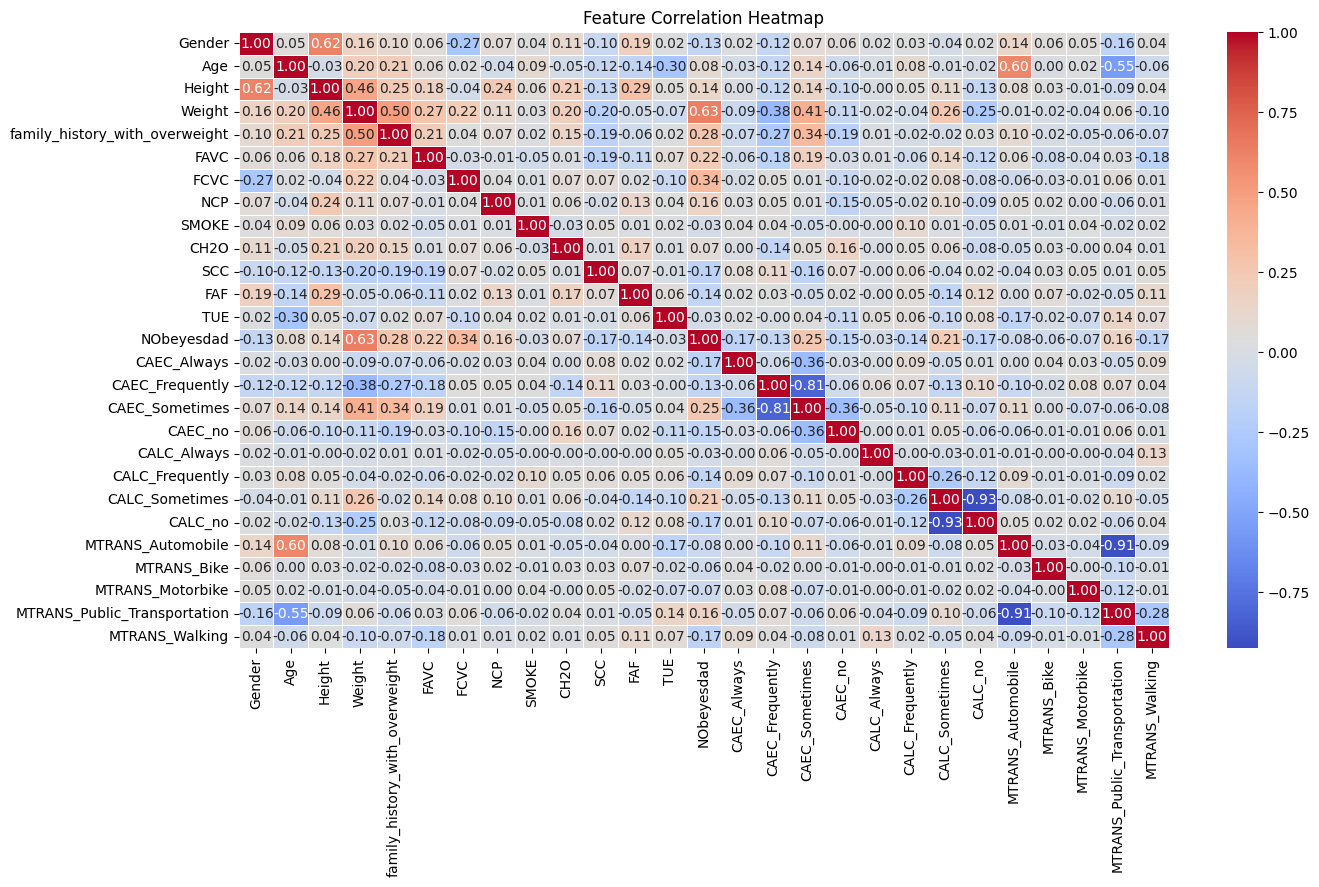

In [ ]:
correlation_matrix = df_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
correlation_matrix["NObeyesdad"]

Gender                           -0.131605
Age                               0.084565
Height                            0.137662
Weight                            0.634348
family_history_with_overweight    0.275149
FAVC                              0.221948
FCVC                              0.343951
NCP                               0.157947
SMOKE                            -0.030298
CH2O                              0.070423
SCC                              -0.169642
FAF                              -0.142211
TUE                              -0.034355
NObeyesdad                        1.000000
CAEC_Always                      -0.174046
CAEC_Frequently                  -0.133597
CAEC_Sometimes                    0.251758
CAEC_no                          -0.152442
CALC_Always                      -0.033287
CALC_Frequently                  -0.137304
CALC_Sometimes                    0.214072
CALC_no                          -0.165055
MTRANS_Automobile                -0.083684
MTRANS_Bike                      -0.059284
MTRANS_Motorbike                 -0.071090
MTRANS_Public_Transportation      0.161921
MTRANS_Walking                   -0.169668
Name: NObeyesdad, dtype: float64

### Drop the columns which have low correlation with the target value

In [ ]:
# Find features with low correlation to NObeyesdad
low_correlation_features = correlation_matrix["NObeyesdad"].abs()[correlation_matrix["NObeyesdad"].abs() < 0.1].index

# Drop them
df_drop = df_encoded.drop(columns=low_correlation_features)
print("Dropped low-correlation features:", low_correlation_features)

Dropped low-correlation features: Index(['Age', 'SMOKE', 'CH2O', 'TUE', 'CALC_Always', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike'],
      dtype='object')


In [ ]:
df_drop.head()

Gender  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  \
0       0    1.62    64.0                               1     0   2.0  3.0   
1       0    1.52    56.0                               1     0   3.0  3.0   
2       1    1.80    77.0                               1     0   2.0  3.0   
3       1    1.80    87.0                               0     0   3.0  3.0   
4       1    1.78    89.8                               0     0   2.0  1.0   

   SCC  FAF  NObeyesdad  CAEC_Always  CAEC_Frequently  CAEC_Sometimes  \
0    0  0.0           0            0                0               1   
1    1  3.0           0            0                0               1   
2    0  2.0           0            0                0               1   
3    0  2.0           1            0                0               1   
4    0  0.0           2            0                0               1   

   CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  \
0        0                0               0        1   
1        0                0               1        0   
2        0                1               0        0   
3        0                1               0        0   
4        0                0               1        0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             1               0  
2                             1               0  
3                             0               1  
4                             1               0

## Categorical Data and Numerical Data After Dropping Columns

In [ ]:
categorical_data1 = [col for col in categorical_data if col not in low_correlation_features]
numerical_data1 = [col for col in numerical_data if col not in low_correlation_features]


In [ ]:
categorical_data1

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
numerical_data1

['Height', 'Weight', 'FCVC', 'NCP', 'FAF']

## Analysis and visulization of all data

### Univarient analysis

<ipython-input-148-523dcea68d68>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


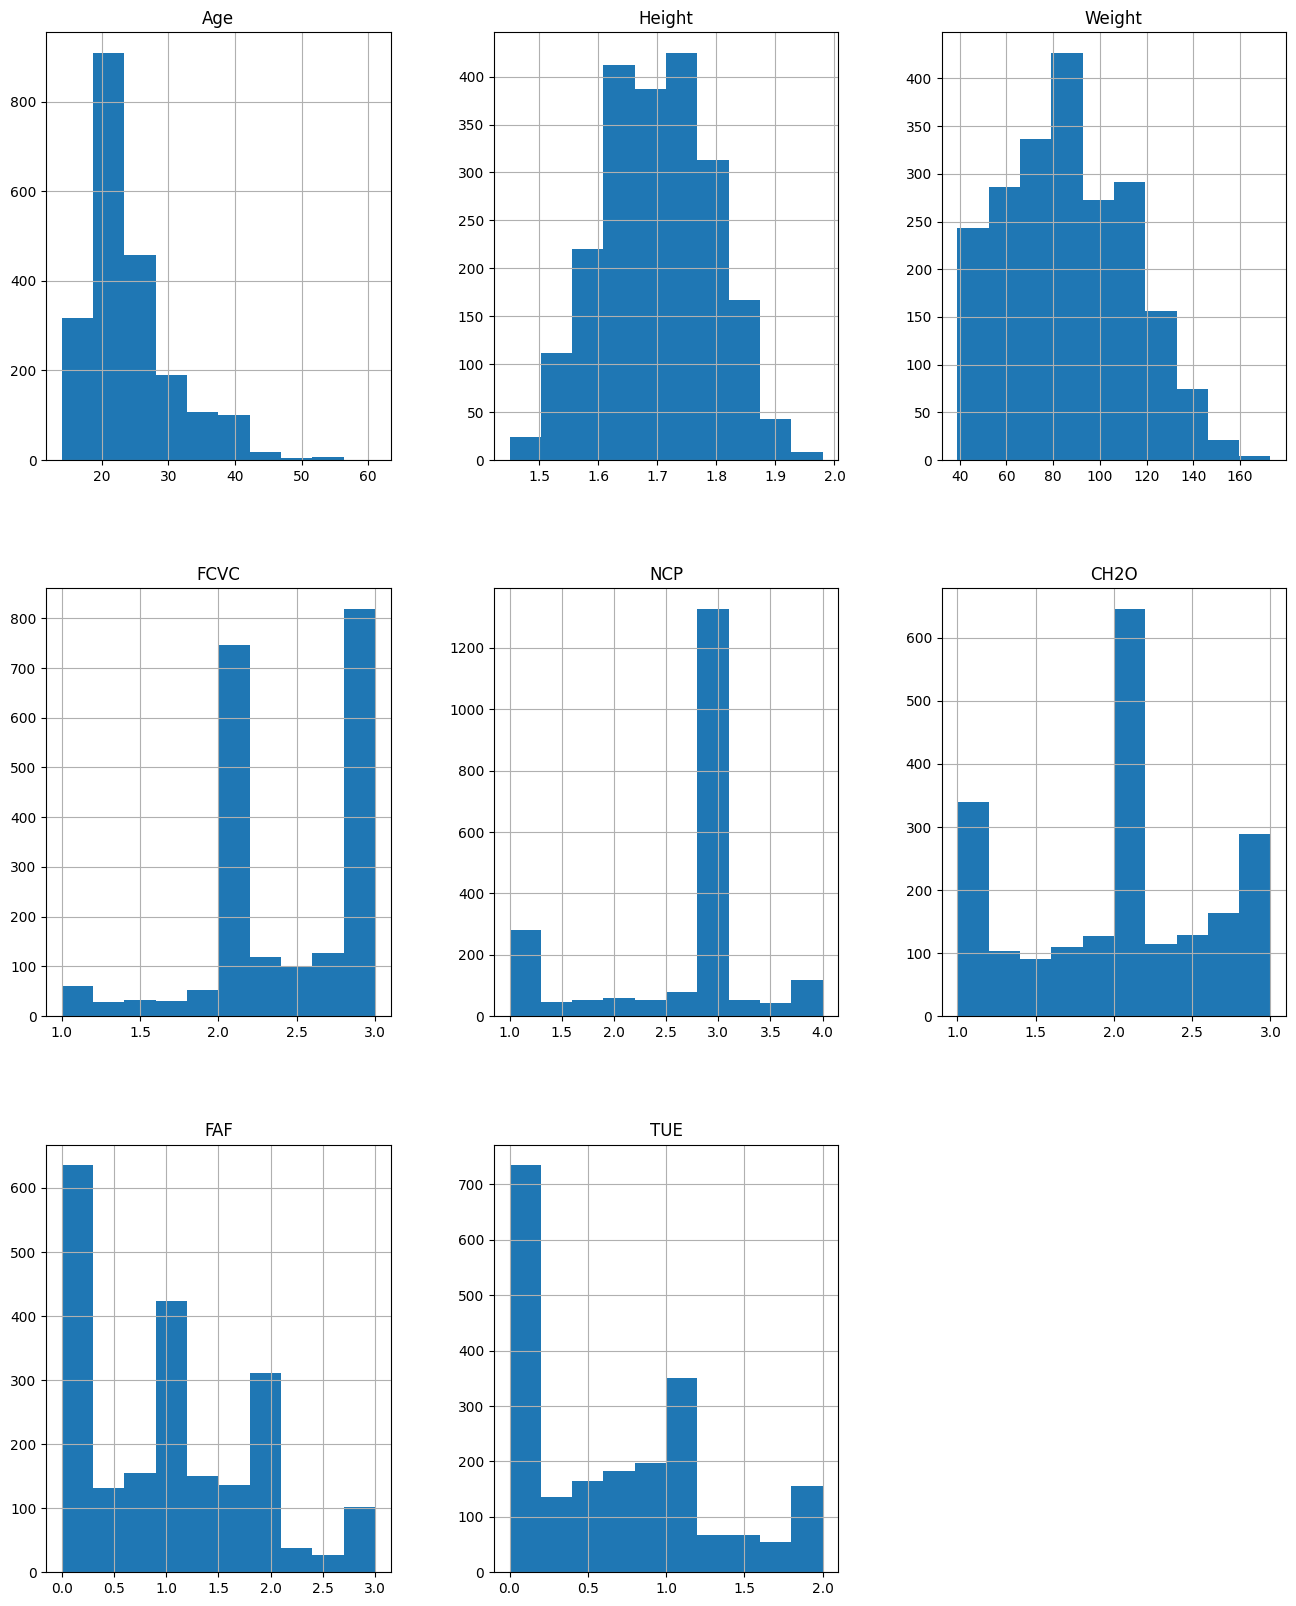

In [ ]:
# Chart - 1 visualization code
fig = plt.figure(figsize = (16,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### Insights

1. What is/are the insight(s) found from the chart?

From above distribution plot we can say that the data on the family_history_with_overweight, FAVC(Frequent Consumption of High-Caloric Food), FCVC(Frequency of Vegetable Consumption), SCC(Calories Consumption Monitoring) are poorly balanced.

While data on the Gender , NObeyesdad(target Value) are highly balanced.

### Chart-2 Data distribution visualization of numerical data

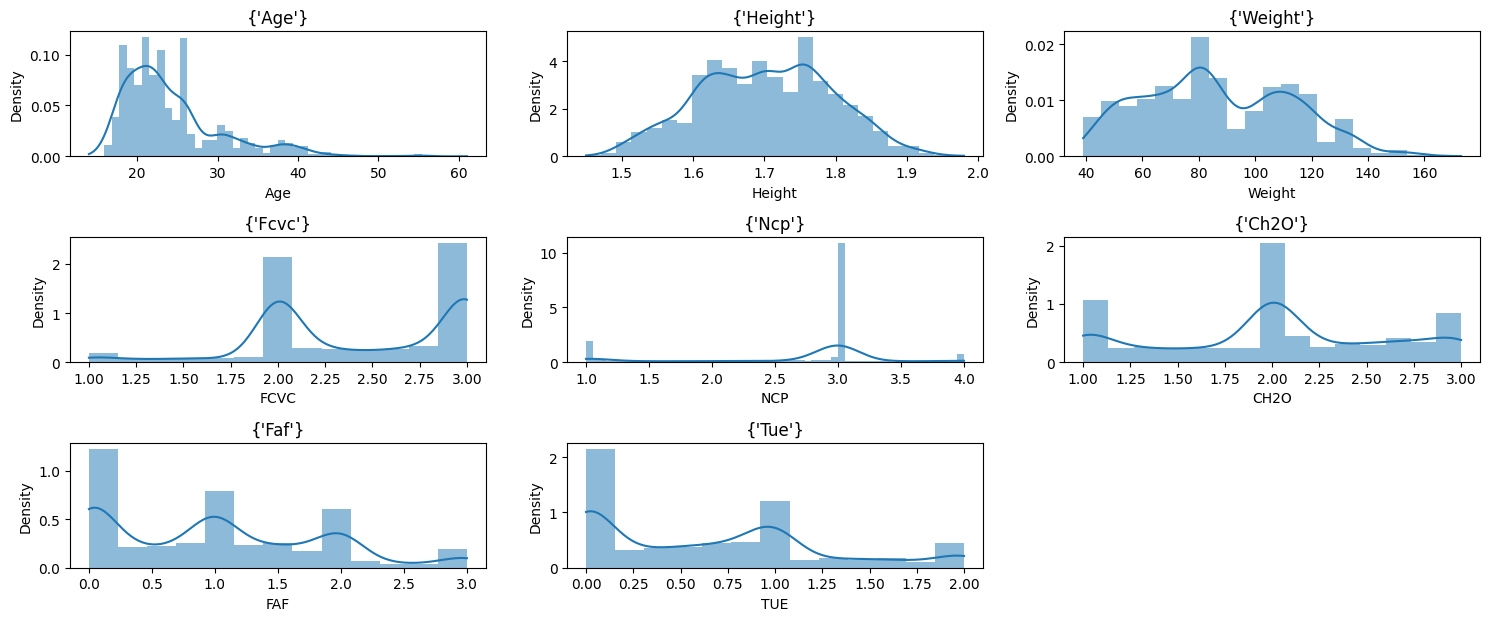

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,10))
for n, col in enumerate(numerical_data):
    if col in df.columns:  # Check if column exists in DataFrame
        plt.subplot(5,3, n+1)
        sns.histplot((df[col]), edgecolor='none', linewidth=0, kde=True, stat="density")

        plt.title({col.title()})
        plt.tight_layout()
    else:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping.")

### Chart-3 Histogram plot of numerical data with MEAN/MEDIAN

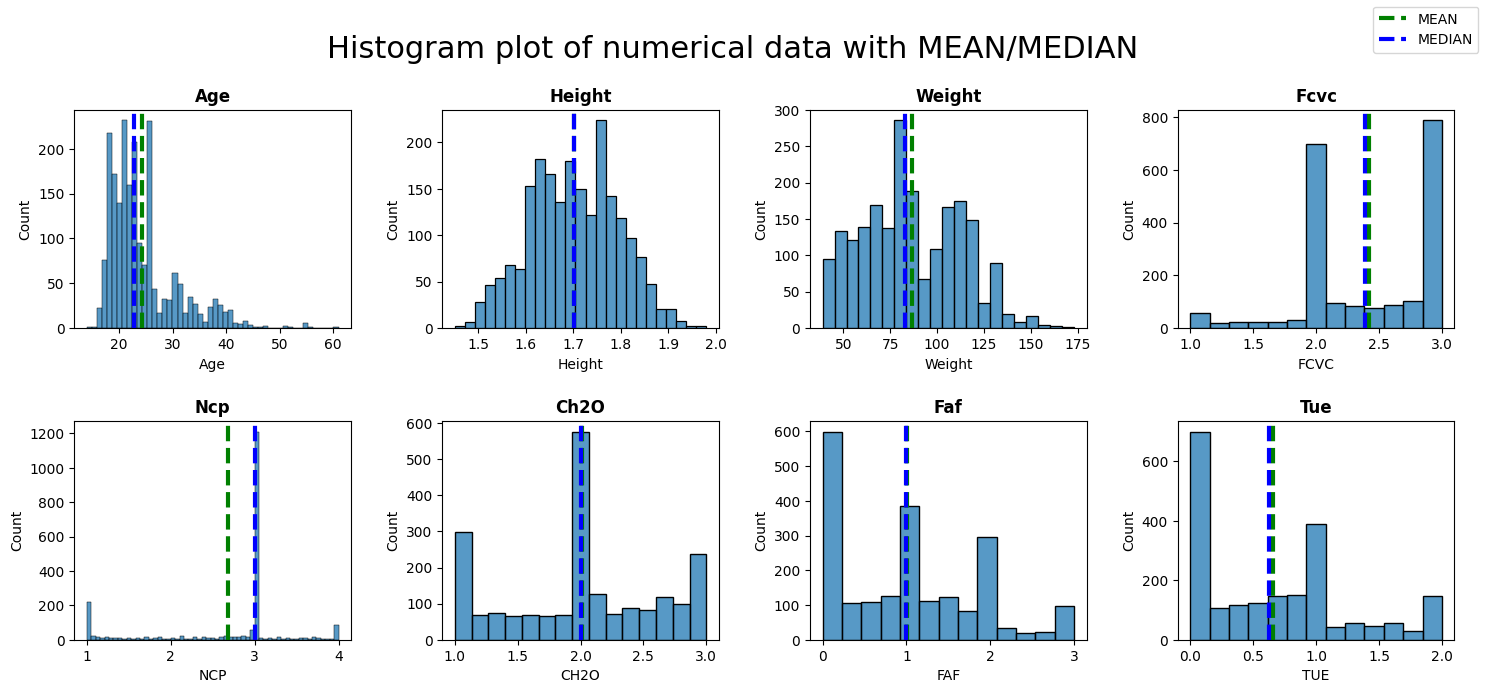

In [ ]:
fig = plt.figure(figsize=(15,16))
for n,column in enumerate(numerical_data):
  features_var = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(features_var)
  ax.axvline(features_var.mean(), color='green',label = "MEAN", linestyle='dashed', linewidth=3)
  ax.axvline(features_var.median(), color='blue', linestyle='dashed',label = "MEDIAN", linewidth=3)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.suptitle('Histogram plot of numerical data with MEAN/MEDIAN', fontsize = 22)
plt.tight_layout(pad = 2)

### NObeyesdad level distribution

#### Overall

<Axes: title={'center': 'Distribution of NObeyesdad'}, ylabel='count'>

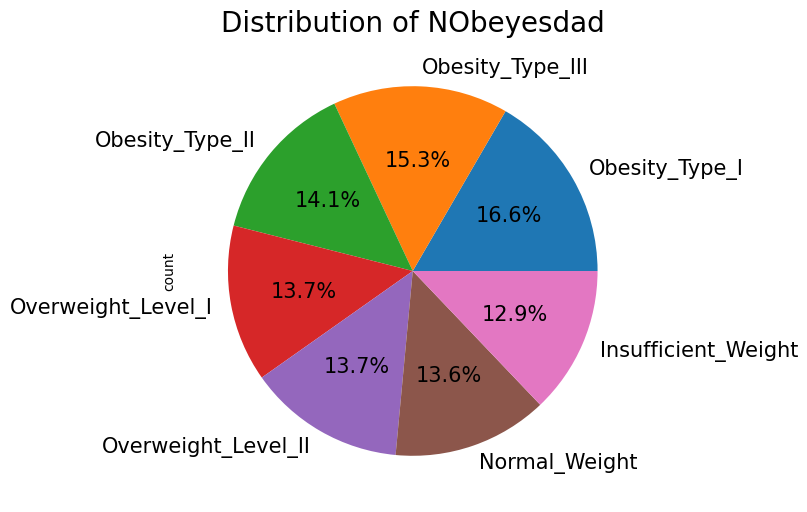

In [ ]:
plt.figure(figsize=(17,6))
plt.title('Distribution of NObeyesdad', fontsize=20)
df['NObeyesdad'].value_counts().plot(kind='pie', autopct='%1.1f%%' , fontsize=15 )

#### With Respect to Gender

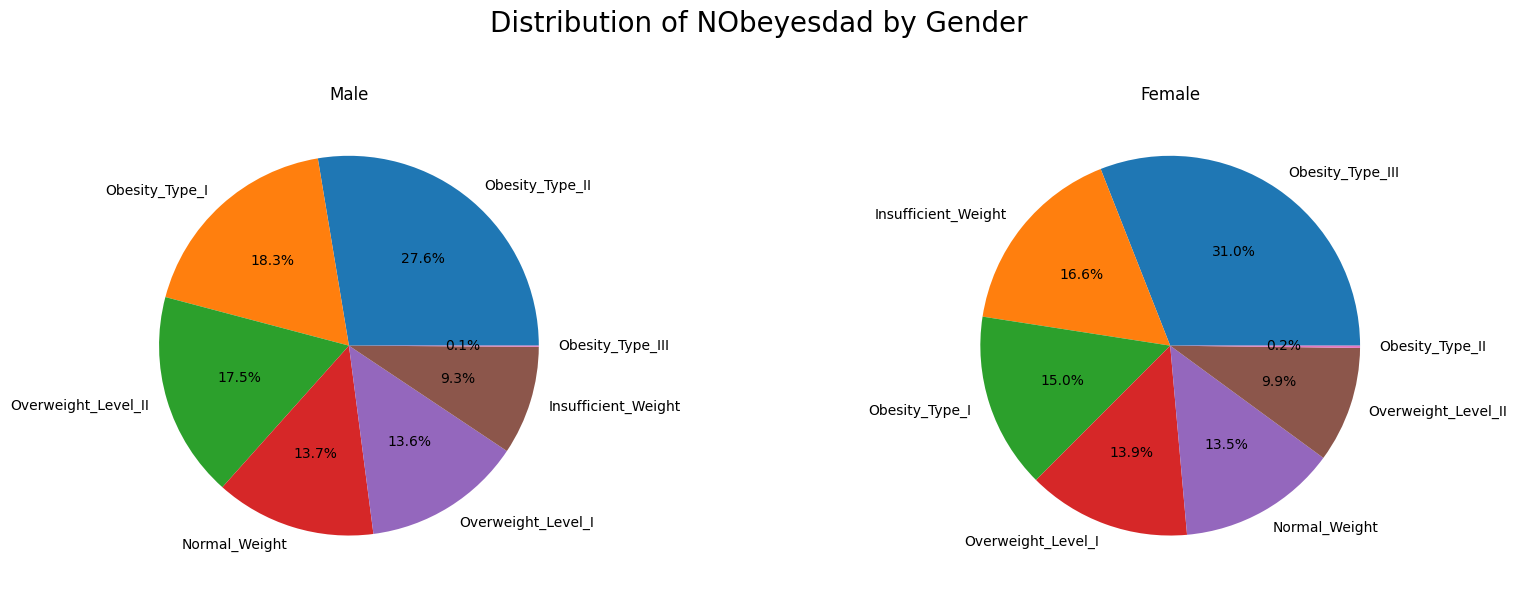

In [ ]:
male, female = df[df["Gender"] == 'Male'], df[df["Gender"] == 'Female']

fig, ax = plt.subplots(1, 2, figsize=(17, 6))
plt.suptitle('Distribution of NObeyesdad by Gender', fontsize=20)

# Pie for Males
male_counts = male['NObeyesdad'].value_counts()
ax[0].pie(male_counts, labels=male_counts.index, autopct='%1.1f%%')
ax[0].set_title('Male')

# Pie for Females
female_counts = female['NObeyesdad'].value_counts()
ax[1].pie(female_counts, labels=female_counts.index, autopct='%1.1f%%')
ax[1].set_title('Female')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Bivariate Analysis

In [ ]:
df_drop.columns

Index(['Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SCC', 'FAF', 'NObeyesdad', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

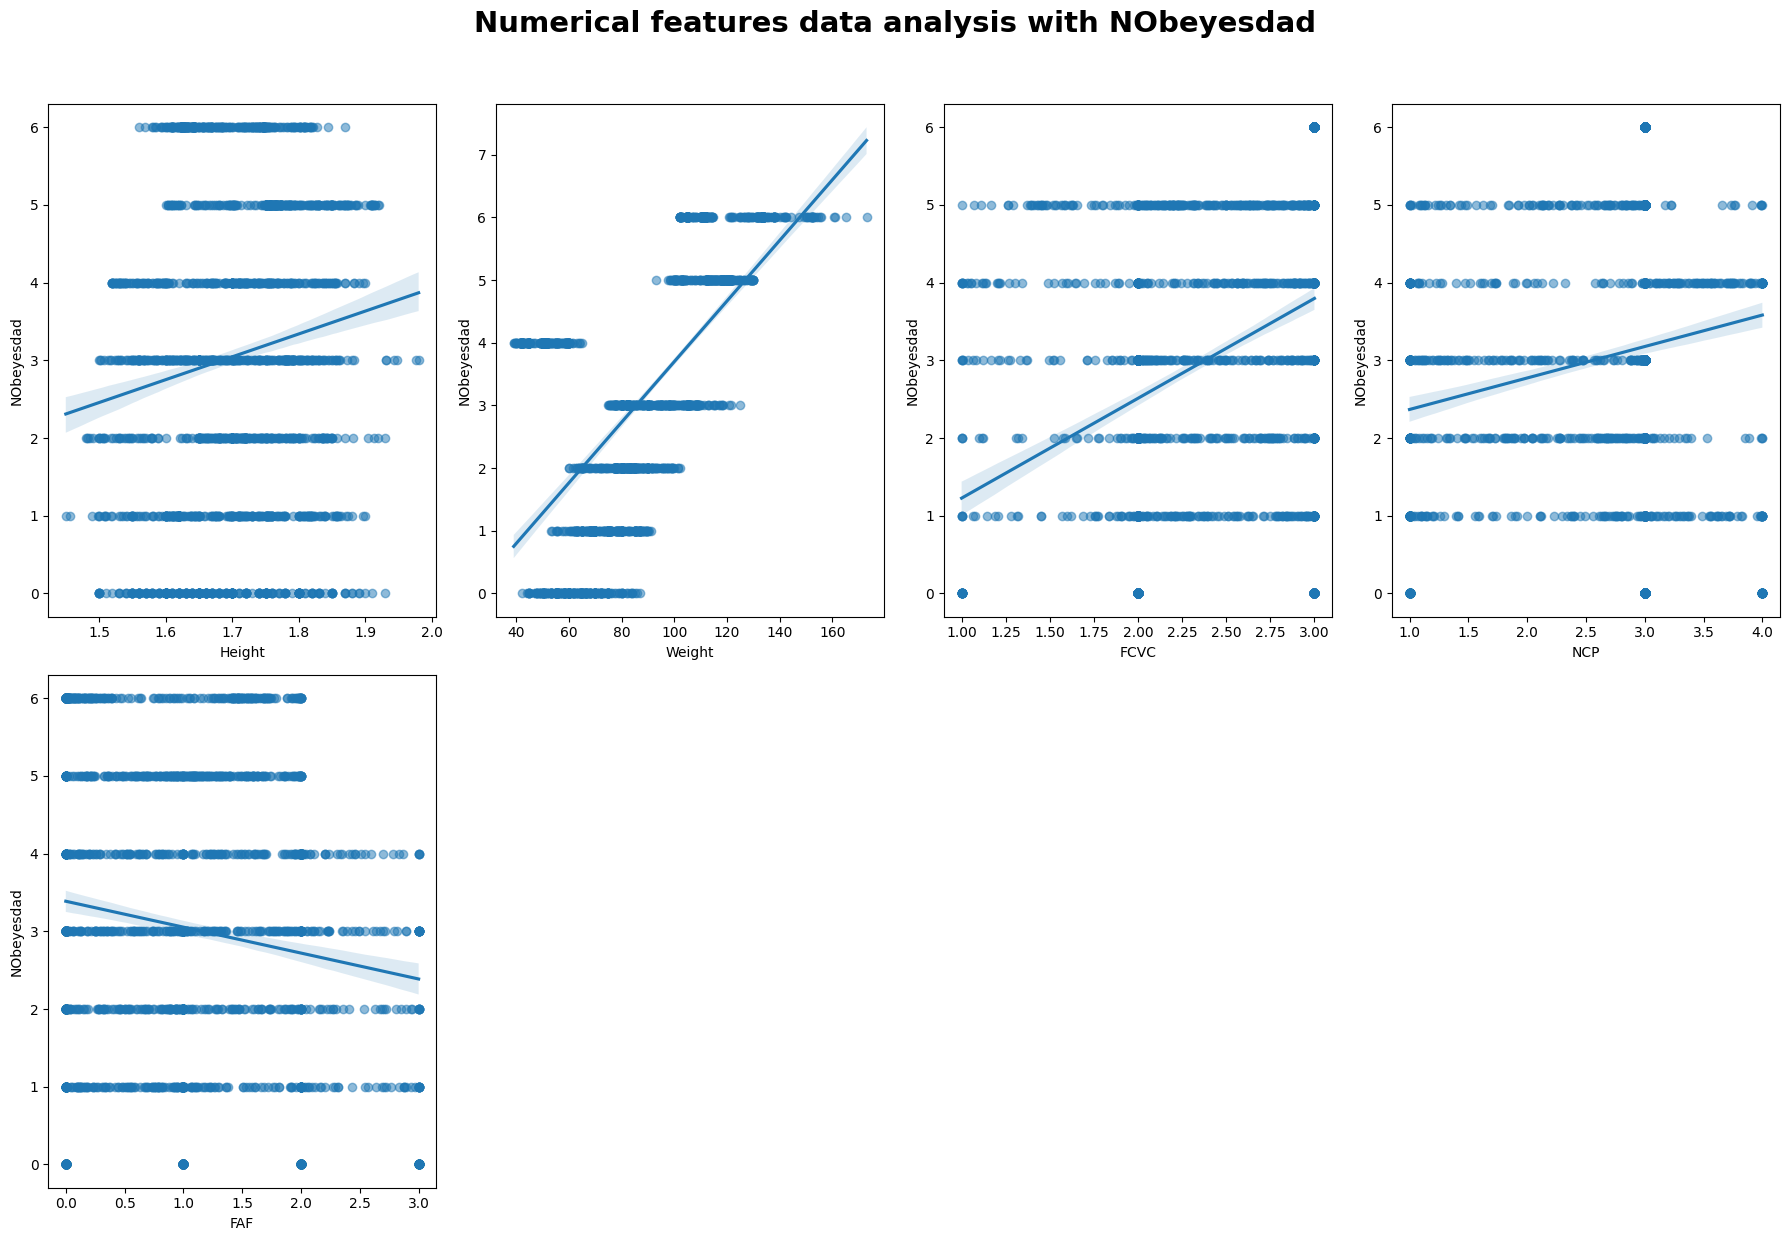

In [ ]:
plt.figure(figsize=(18, 12))
plt.suptitle('Numerical features data analysis with NObeyesdad', fontsize=21, fontweight='bold', y=1.03)

num_cols = 4
num_rows = int(np.ceil(len(numerical_data) / num_cols))

for i, col in enumerate(numerical_data1):
    plt.subplot(num_rows, num_cols, i+1)
    x_data = pd.to_numeric(df_drop[col], errors='coerce')
    sns.regplot(x=x_data, y=df_drop['NObeyesdad'], scatter_kws={'alpha': 0.5})
    plt.xlabel(col)

    plt.xlabel(col)
    plt.tight_layout()


In [ ]:
categorical_data1

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
# categorical_data.remove('NObeyesdad')
categorical_data

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

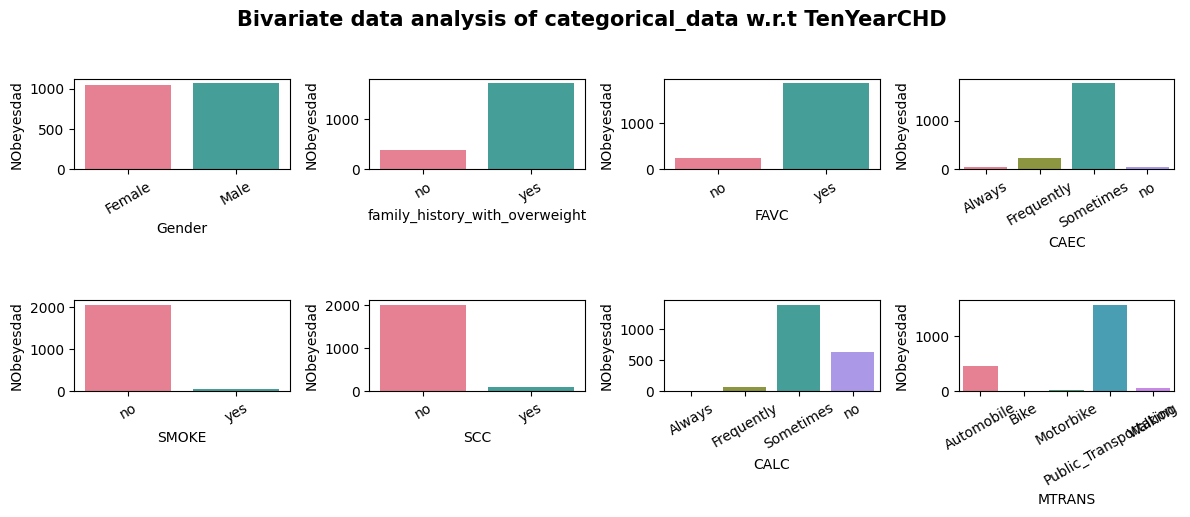

In [ ]:
plt.figure(figsize=(12,6))
plt.suptitle('Bivariate data analysis of categorical_data w.r.t TenYearCHD ', fontsize=15, fontweight='bold', y=1.03)

for i,col in enumerate(categorical_data[:-1]):
    plt.subplot(3, 4, i+1)
    a = df.groupby(col)[['NObeyesdad']].count().reset_index()

    # barplot
    sns.barplot(x=a[col], y = a['NObeyesdad'],  palette='husl', hue = a[col], legend = False)
    # sns.set_xticklabels(rotation=30)
    # x-axis labelling
    plt.xticks(rotation=30)
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Age vs NObeyesdad

In [ ]:
min_age = df['Age'].min()
max_age = df['Age'].max()

print(min_age)
print(max_age)

14.0
61.0


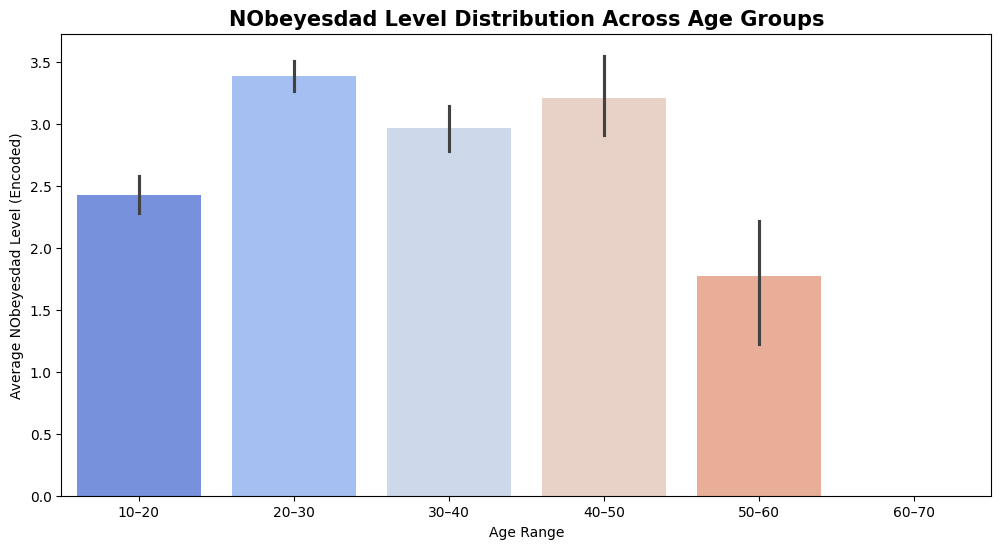

In [ ]:
# Plot CHD rate per age range without modifying the dataframe
plt.figure(figsize=(12, 6))
age_bin = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=['10–20', '20–30', '30–40', '40–50', '50–60', '60–70'])
sns.barplot(
    x= age_bin,
    y=df_drop['NObeyesdad'],
    estimator=np.mean,
    palette='coolwarm',
    hue = age_bin
)

plt.title("NObeyesdad Level Distribution Across Age Groups", fontsize=15, fontweight='bold')
plt.xlabel("Age Range")
plt.ylabel("Average NObeyesdad Level (Encoded)")
plt.show()

In [ ]:
# Define age bins and labels
age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ['10–20', '20–30', '30–40', '40–50', '50–60', '60–70']
df_drop['age_range'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


In [ ]:
df_drop['age_range']

0       20–30
1       20–30
2       20–30
3       20–30
4       20–30
        ...  
2106    20–30
2107    20–30
2108    20–30
2109    20–30
2110    20–30
Name: age_range, Length: 2111, dtype: category
Categories (6, object): ['10–20' < '20–30' < '30–40' < '40–50' < '50–60' < '60–70']

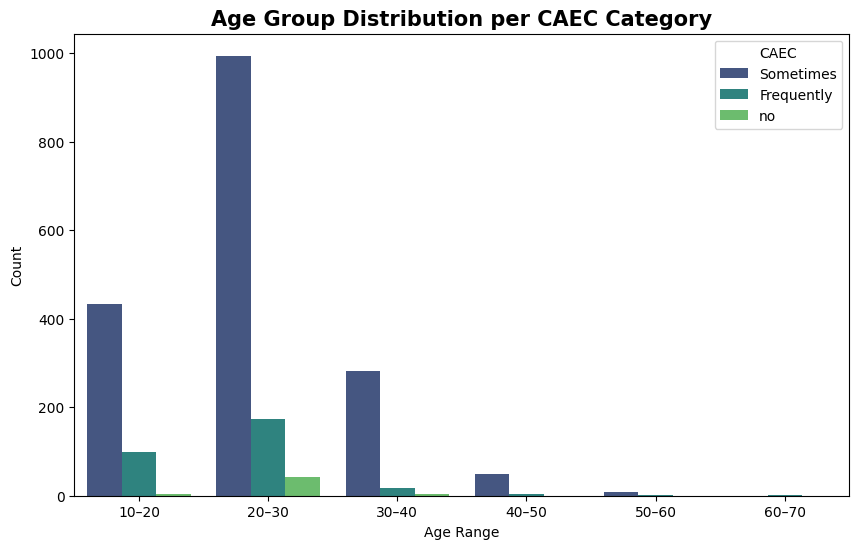

In [ ]:
# Reconstruct CAEC category
caec_labels = ['CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no']
caec_reconstructed = df_drop[caec_labels].idxmax(axis=1).str.replace('CAEC_', '')

plt.figure(figsize=(10, 6))
sns.countplot(x=df_drop['age_range'], hue=caec_reconstructed, palette='viridis')

plt.title('Age Group Distribution per CAEC Category', fontsize=15, fontweight='bold')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='CAEC')
plt.show()


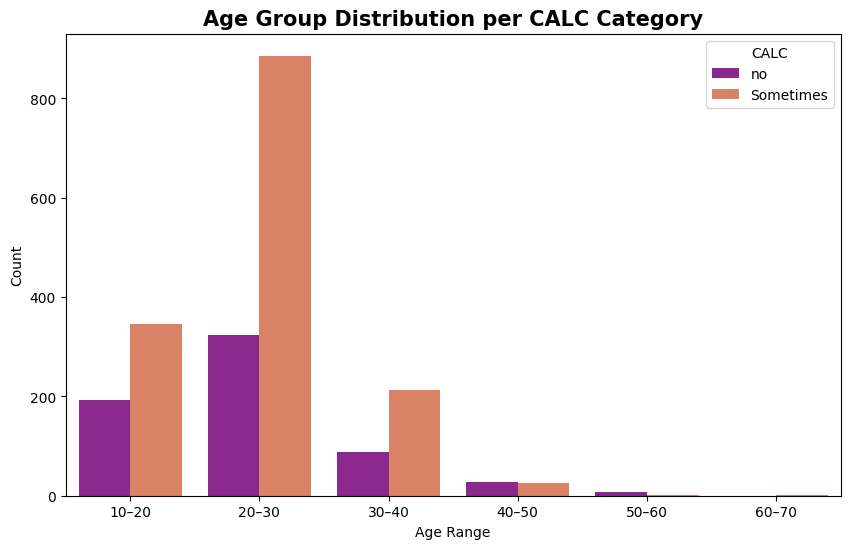

In [ ]:
# Reconstruct CALC category
calc_labels = ['CALC_Sometimes', 'CALC_no']
calc_reconstructed = df_drop[calc_labels].idxmax(axis=1).str.replace('CALC_', '')

plt.figure(figsize=(10, 6))
sns.countplot(x=df_drop['age_range'], hue=calc_reconstructed, palette='plasma')

plt.title('Age Group Distribution per CALC Category', fontsize=15, fontweight='bold')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='CALC')
plt.show()

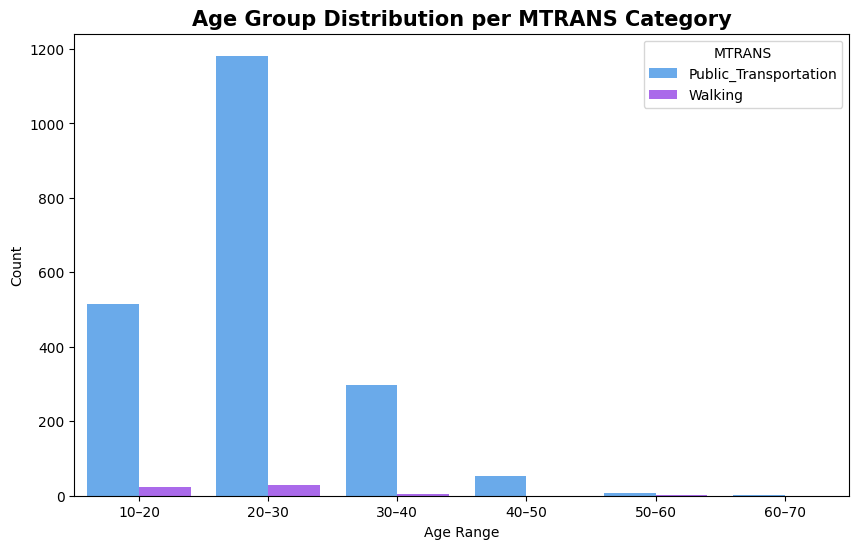

In [ ]:
# Reconstruct MTRANS category
mtrans_labels = ['MTRANS_Public_Transportation', 'MTRANS_Walking']
mtrans_reconstructed = df_drop[mtrans_labels].idxmax(axis=1).str.replace('MTRANS_', '')

plt.figure(figsize=(10, 6))
sns.countplot(x=df_drop['age_range'], hue=mtrans_reconstructed, palette='cool')

plt.title('Age Group Distribution per MTRANS Category', fontsize=15, fontweight='bold')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='MTRANS')
plt.show()


## Multivariate analysis

In [ ]:
numerical_data1

['Height', 'Weight', 'FCVC', 'NCP', 'FAF']

In [ ]:
[col for col in numerical_data1 if col not in ['NObeyesdad', 'Age']]

['Height', 'Weight', 'FCVC', 'NCP', 'FAF']

In [ ]:
df_drop.columns

Index(['Gender', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SCC', 'FAF', 'NObeyesdad', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'age_range'],
      dtype='object')

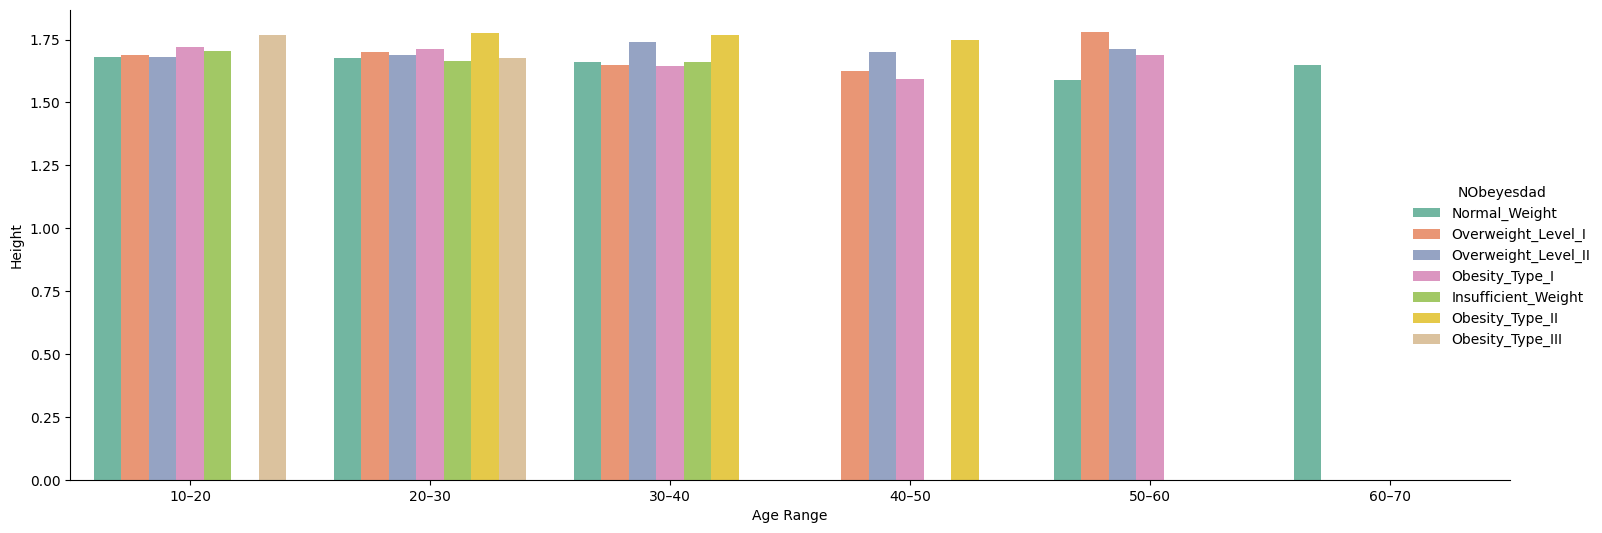

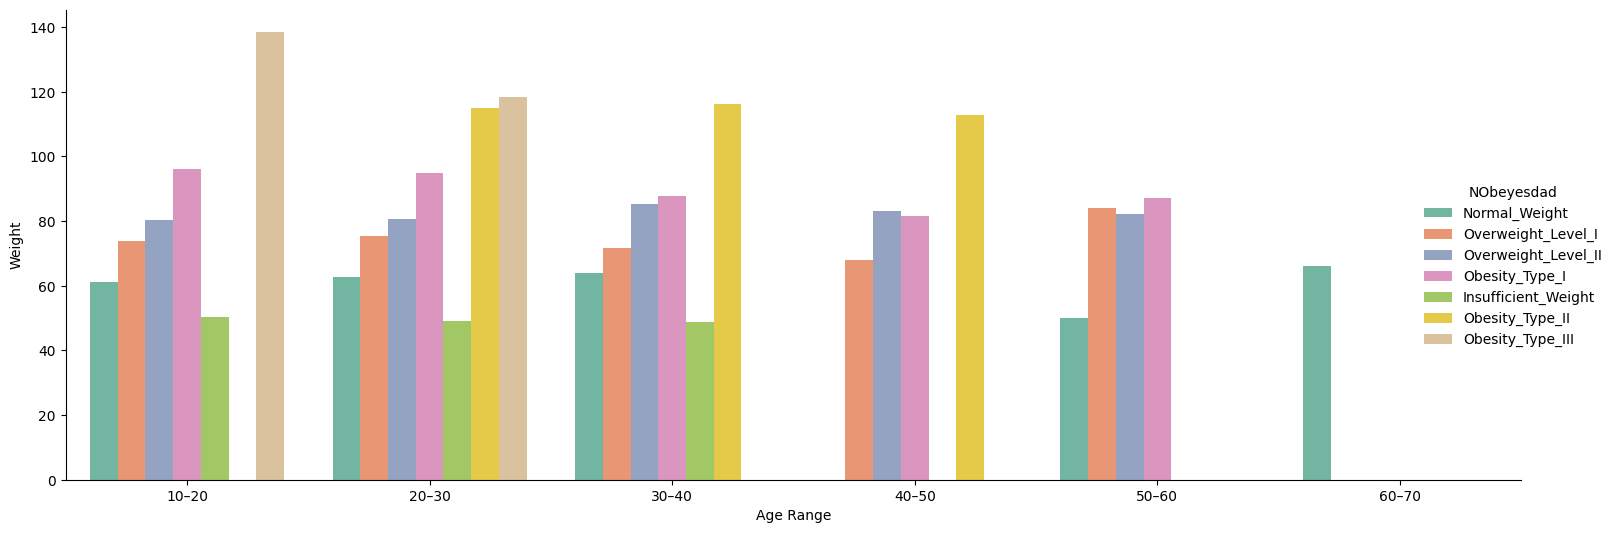

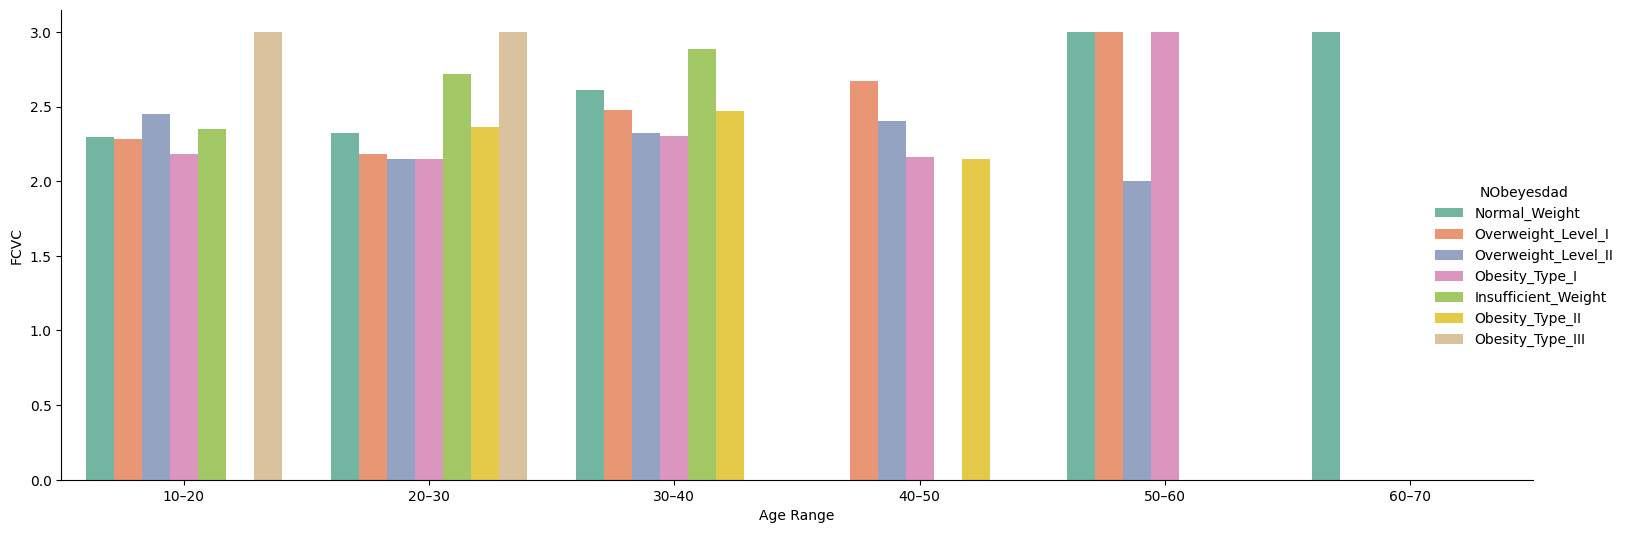

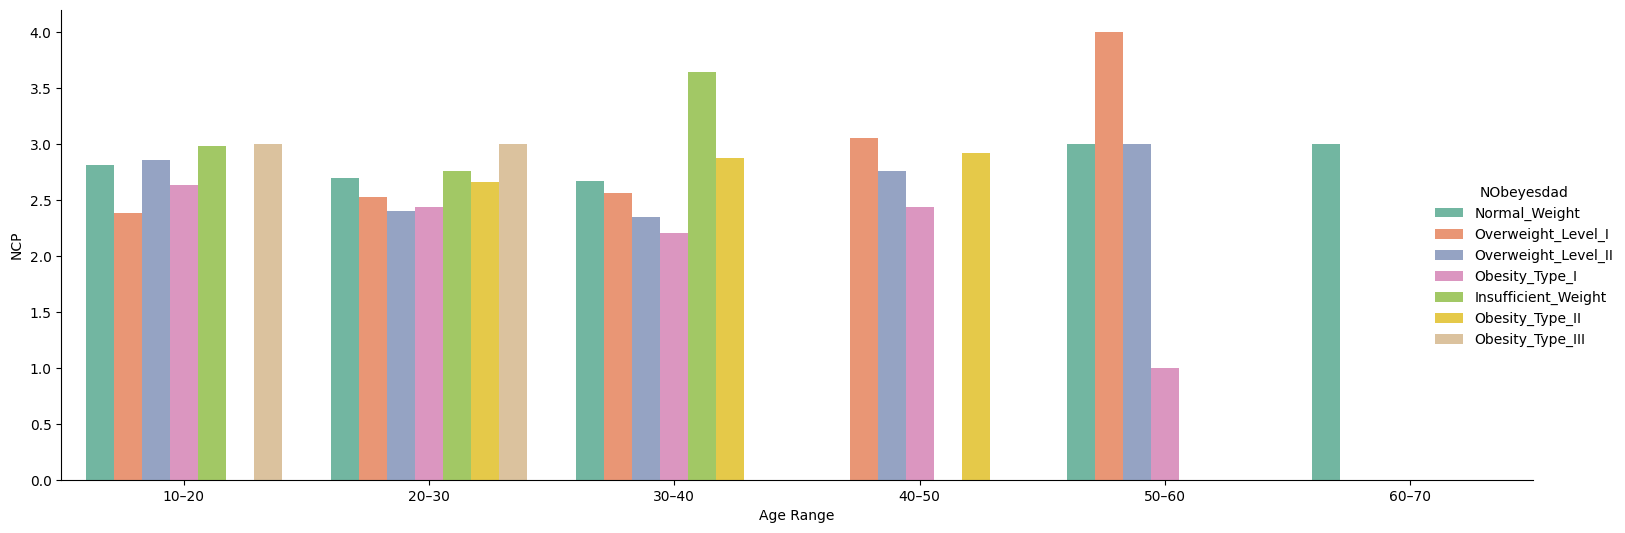

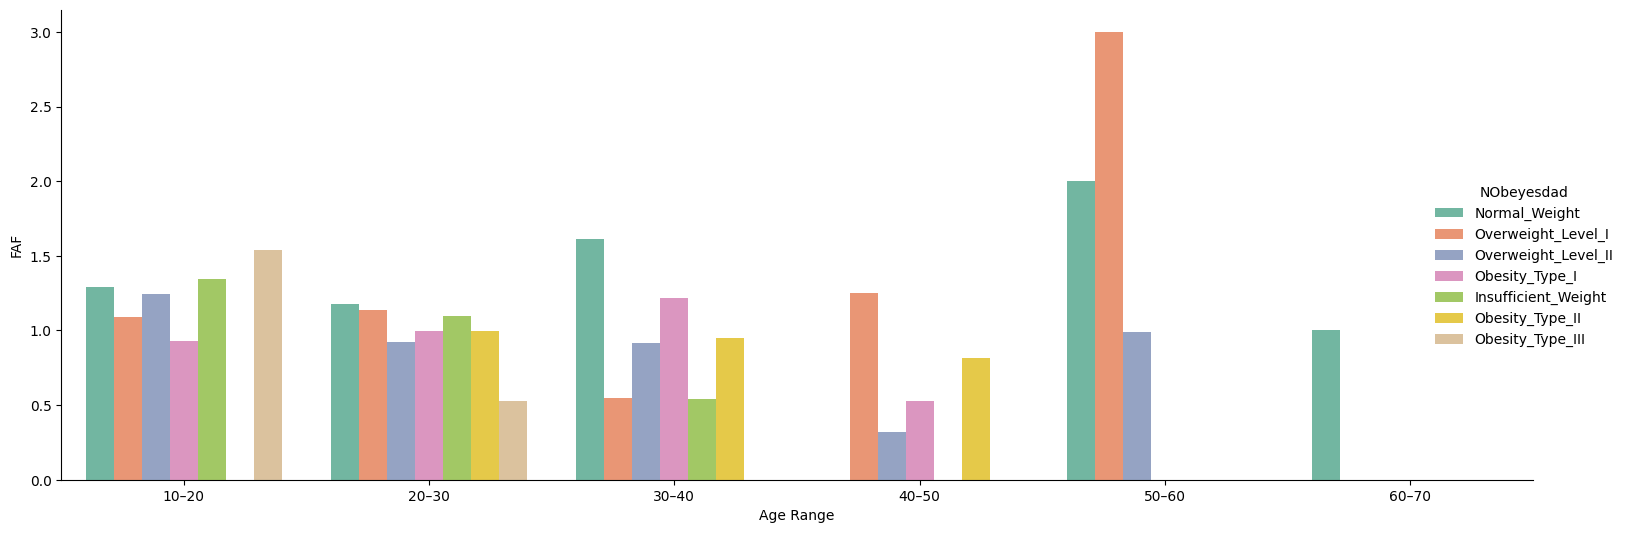

In [ ]:
# 1. Clean numerical features (exclude Age and NObeyesdad)
numerical_features = [col for col in numerical_data1 if col not in ['NObeyesdad', 'Age']]

# 2. Define age bins and labels
age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ['10–20', '20–30', '30–40', '40–50', '50–60', '60–70']

# 3. Plot each feature with binned age (without modifying df)
for col in numerical_features:
    ax = sns.catplot(
        x=pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False),
        y=df_drop[col],
        hue=df["NObeyesdad"],
        kind="bar",
        legend=True,
        # label = df["NObeyesdad"].unique(),
        errorbar=None,
        palette="Set2"
    )
    ax.fig.set_size_inches(18, 6)
    ax.fig.subplots_adjust(top=0.9, right=0.95)
    ax.set_axis_labels("Age Range", col)
    ax.set_titles(f"{col} by Age Group and NObeyesdad Level")


## Correlation Heatmap

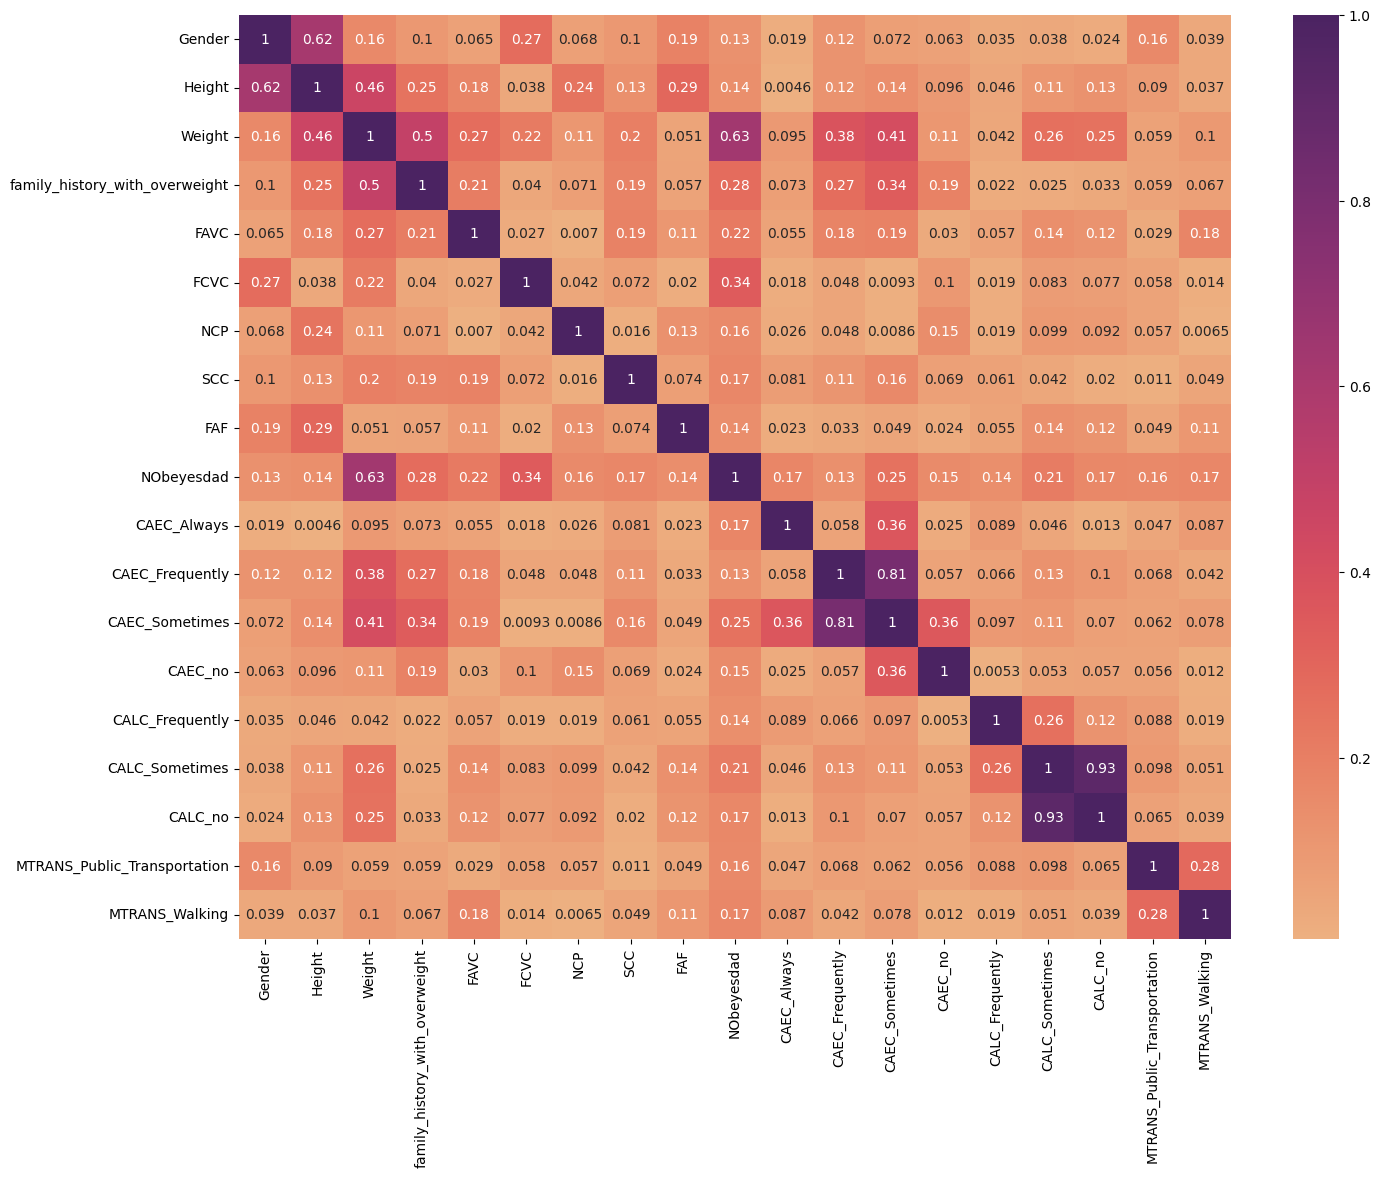

In [ ]:
# Drop the 'age_range' column if it exists
if 'age_range' in df_drop.columns:
    df_drop.drop('age_range', axis=1, inplace=True)
# Chart - 12 visualization code
plt.figure(figsize = (16,12))
plt.xticks(rotation= 45)
correlation_data = df_drop.corr()
sns.heatmap(abs(correlation_data), annot=True, cmap = 'flare')
plt.show()

In [ ]:
numerical_data1

['Height', 'Weight', 'FCVC', 'NCP', 'FAF']

<Figure size 2200x1200 with 0 Axes>

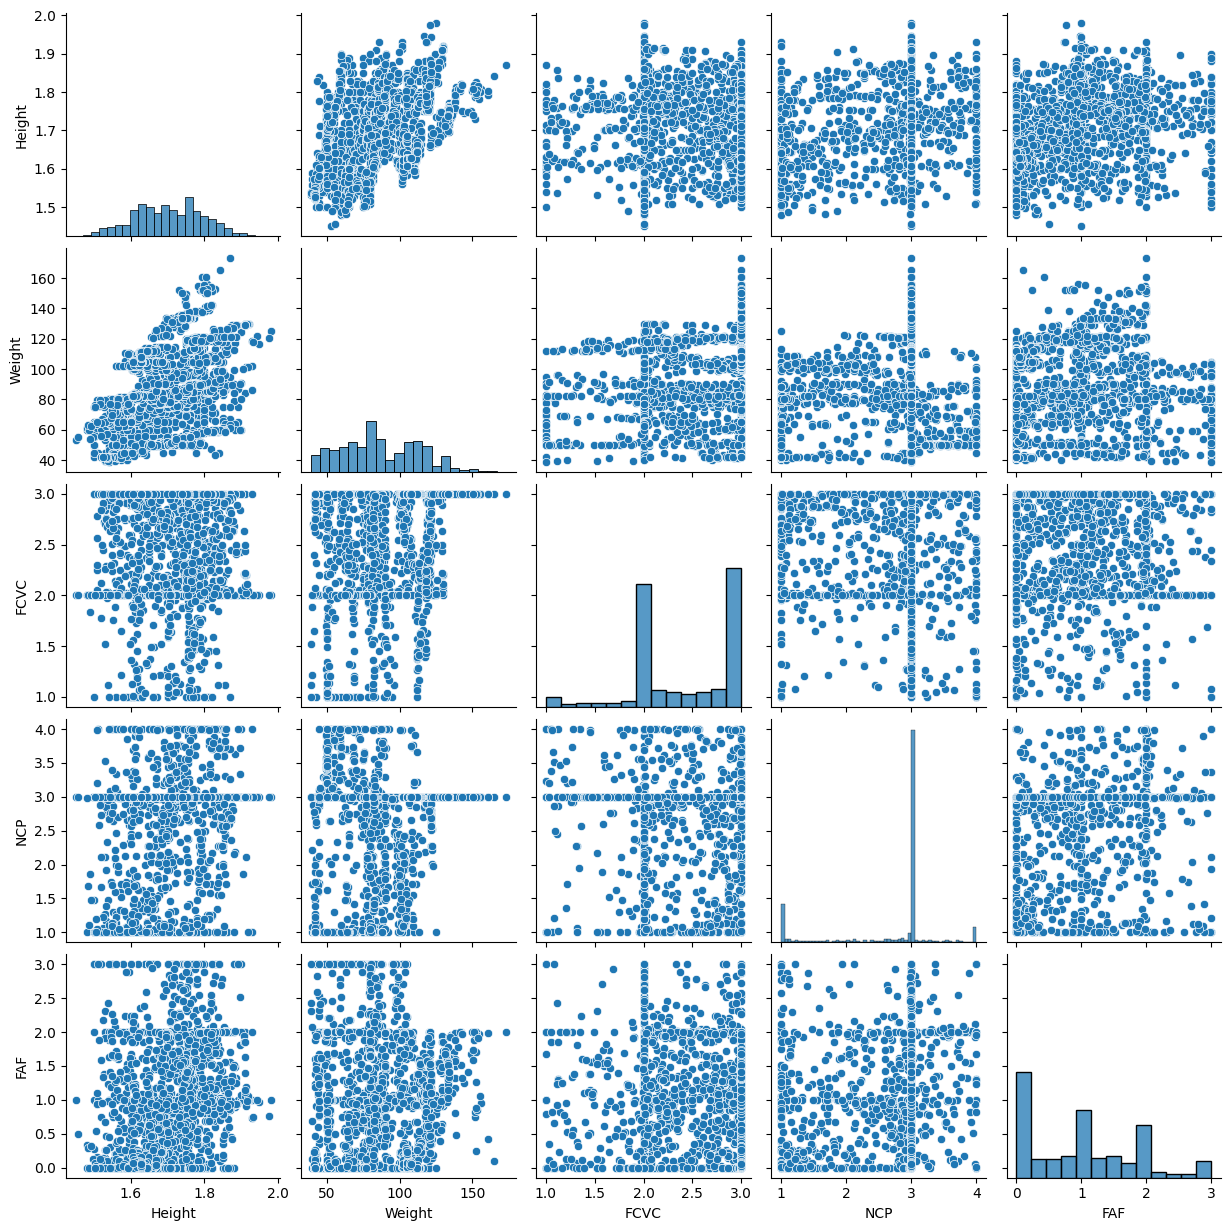

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize = (22,12))
sns.pairplot(df_drop[numerical_data1])
plt.show()

In [ ]:
print(categorical_data1)
print(numerical_data1)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
['Height', 'Weight', 'FCVC', 'NCP', 'FAF']


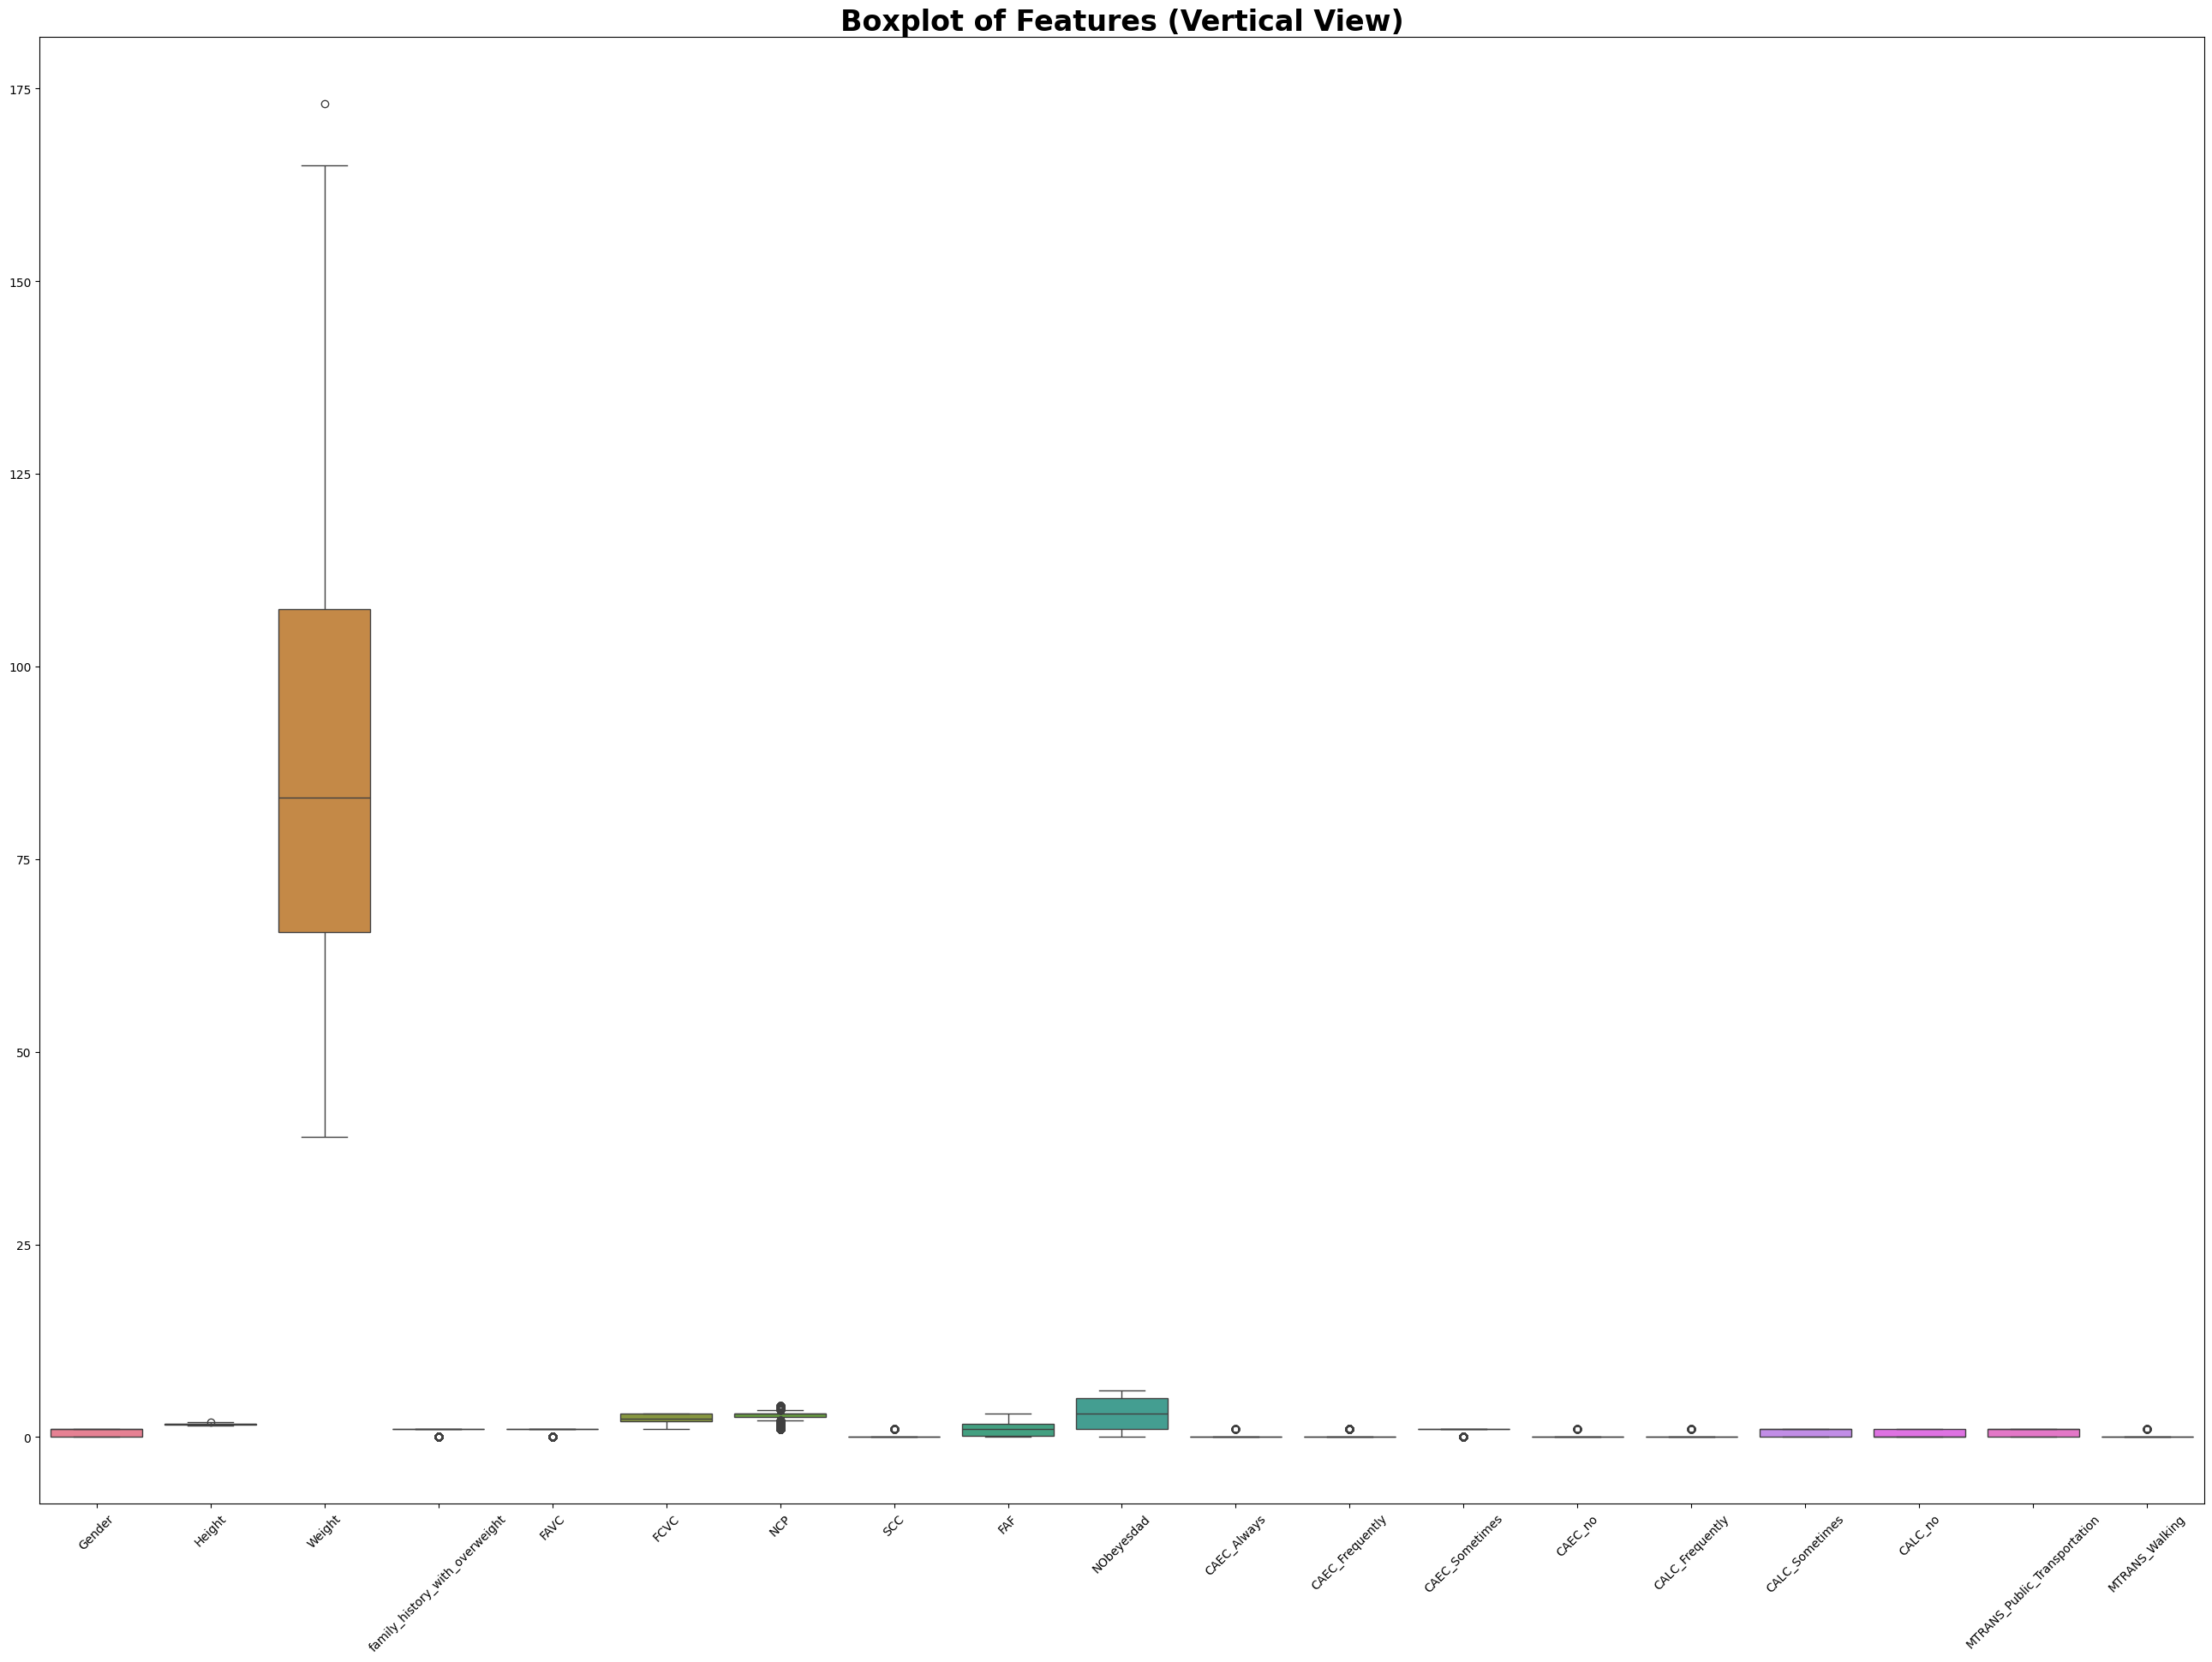

In [ ]:
# fig, axes = plt.subplots(len(df.columns), figsize=(18, 40))

# for i, col in enumerate(df.columns):
#     sns.boxplot(x=df[col], ax=axes[i], orient='h')
#     axes[i].set_xlabel(col)

# plt.tight_layout()
# plt.show()

plt.figure(figsize=(26, 18))
sns.boxplot(data=df_drop, )  # horizontal boxplots
plt.title('Boxplot of Features (Vertical View)', fontsize=24, fontweight='bold')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



## Outlier Detection and Removal

In [ ]:
# Let's Handle the Outliers & Outlier treatments
def removal_outliers(df,column):

    plt.figure(figsize=(10,4))
    plt.suptitle('outliers before the treatment')

    plt.subplot(1, 2, 1)
    plt.ylabel(column)
    sns.boxplot(df[column])
    plt.subplot(1, 2, 2)
    plt.ylabel(f"{column} density")
    sns.histplot(df[column],edgecolor='none', linewidth=0, kde=True, stat="density")

    #here use the z-score
    mask = ((df[column] - df[column].mean()) / df[column].std()).abs()
    df = df[(mask > -3) & (mask < 3)]

    plt.figure(figsize=(10,4))
    plt.suptitle('outliers after the treatment')

    plt.subplot(1, 2, 1)
    plt.ylabel(column)
    sns.boxplot(df[column])
    plt.subplot(1, 2, 2)
    plt.ylabel(f"{column} density")
    sns.histplot(df[column],edgecolor='none', linewidth=0, kde=True, stat="density")
    return df


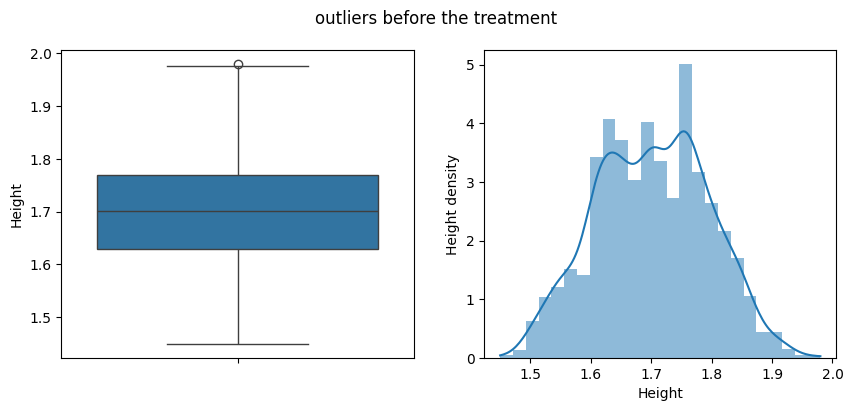

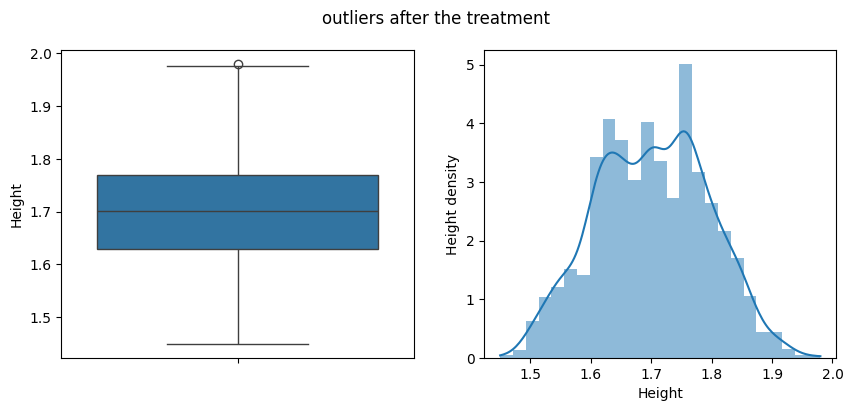

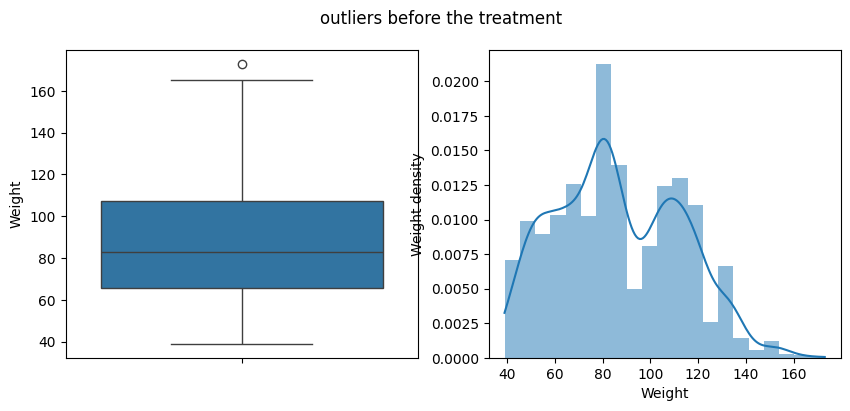

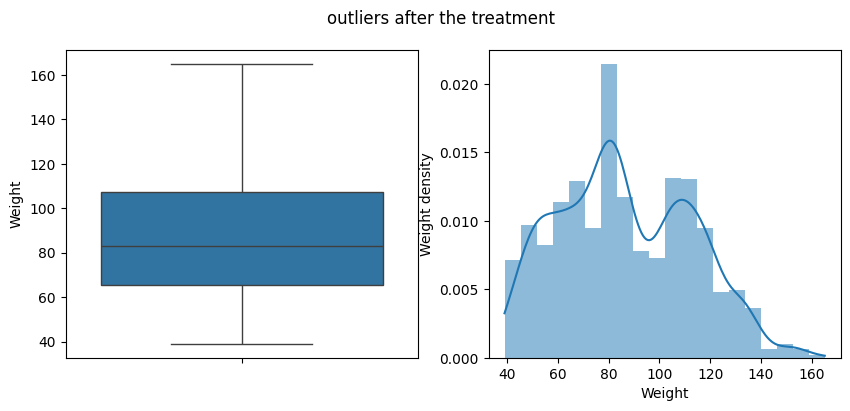

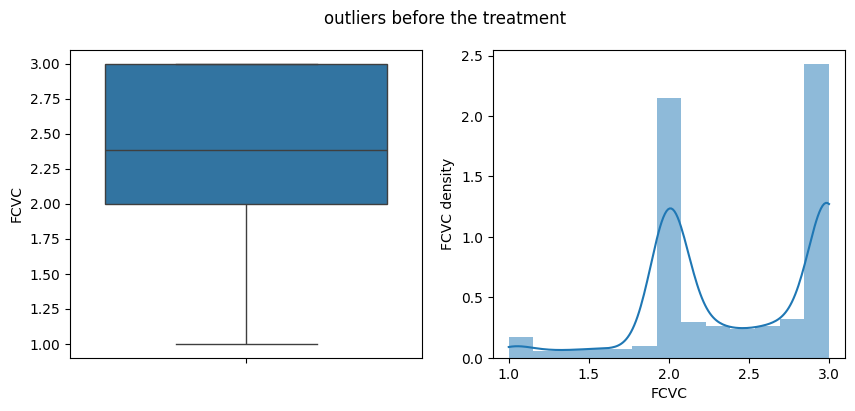

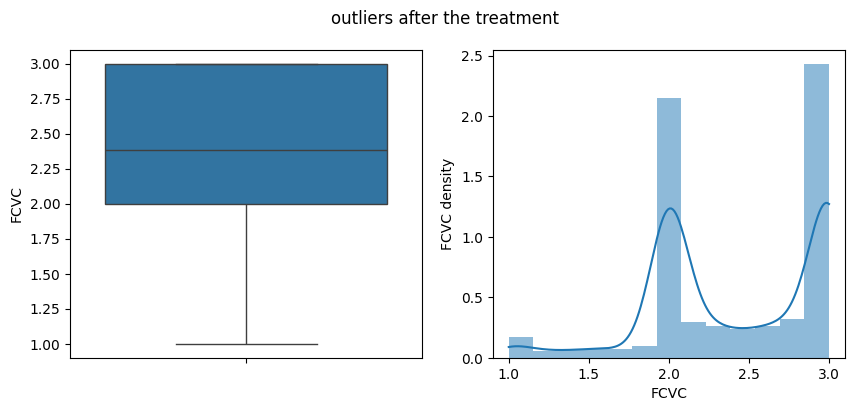

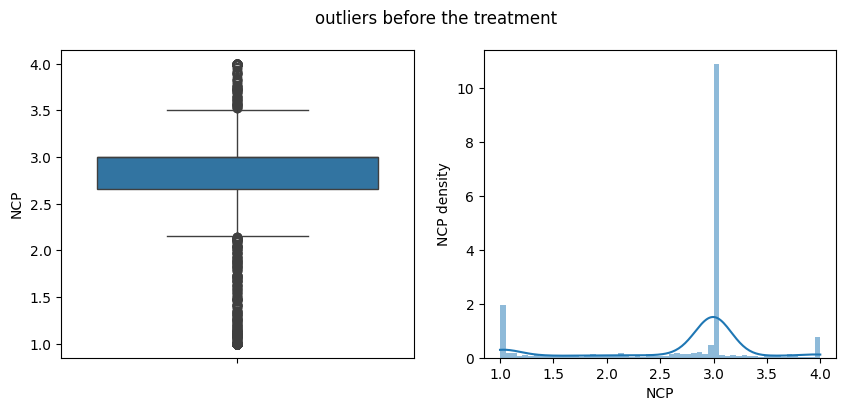

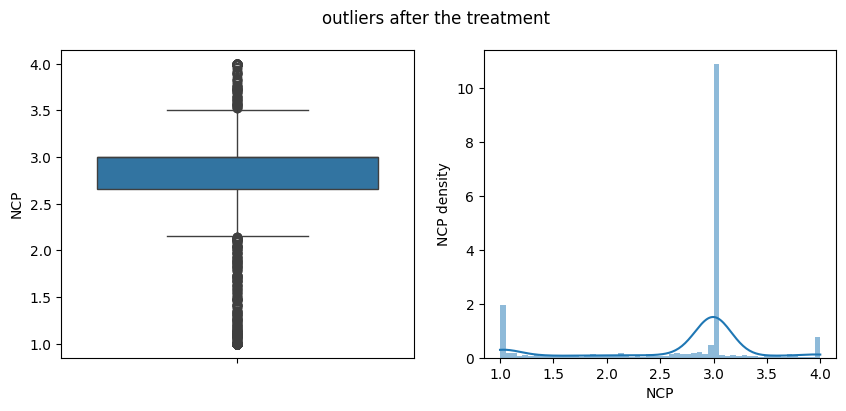

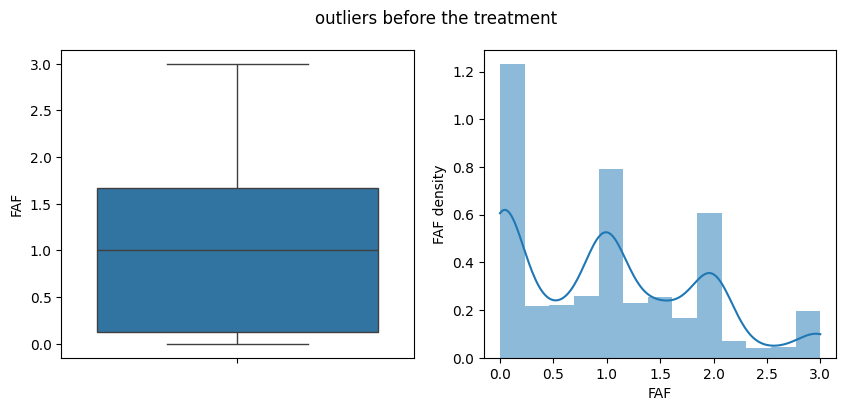

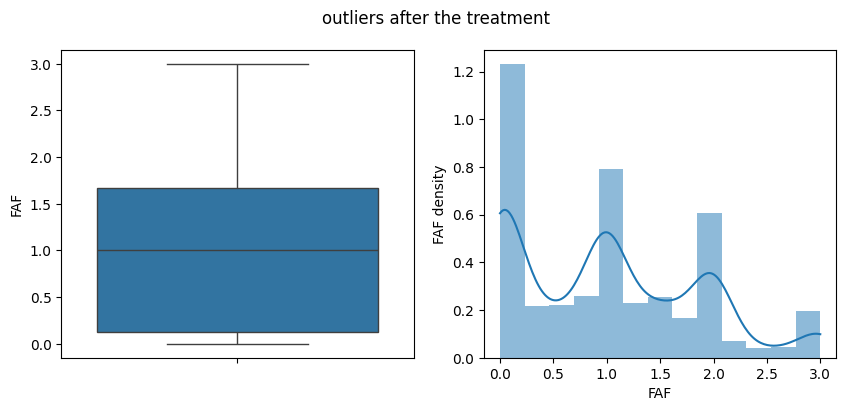

In [ ]:
# Now plot the outliers for the numerical columns
for columns in numerical_data1:
  df_drop = removal_outliers(df_drop,columns)

In [ ]:
df_drop.head()

Gender  Height  Weight  family_history_with_overweight  FAVC  FCVC  NCP  \
0       0    1.62    64.0                               1     0   2.0  3.0   
1       0    1.52    56.0                               1     0   3.0  3.0   
2       1    1.80    77.0                               1     0   2.0  3.0   
3       1    1.80    87.0                               0     0   3.0  3.0   
4       1    1.78    89.8                               0     0   2.0  1.0   

   SCC  FAF  NObeyesdad  CAEC_Always  CAEC_Frequently  CAEC_Sometimes  \
0    0  0.0           0            0                0               1   
1    1  3.0           0            0                0               1   
2    0  2.0           0            0                0               1   
3    0  2.0           1            0                0               1   
4    0  0.0           2            0                0               1   

   CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  \
0        0                0               0        1   
1        0                0               1        0   
2        0                1               0        0   
3        0                1               0        0   
4        0                0               1        0   

   MTRANS_Public_Transportation  MTRANS_Walking  
0                             1               0  
1                             1               0  
2                             1               0  
3                             0               1  
4                             1               0

In [ ]:
df_drop['BMI'] = df_drop['Weight'] / (df_drop['Height'] ** 2)


In [ ]:
df_drop.drop(['Height','Weight'], axis = 1, inplace = True)

In [ ]:
df_drop.head(1)

Gender  family_history_with_overweight  FAVC  FCVC  NCP  SCC  FAF  \
0       0                               1     0   2.0  3.0    0  0.0   

   NObeyesdad  CAEC_Always  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
0           0            0                0               1        0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Public_Transportation  \
0                0               0        1                             1   

   MTRANS_Walking        BMI  
0               0  24.386526

## Feature Selection

In [ ]:
# Now we have Define a function for variance_inflation_factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):

    # Now Calculate the VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by = ['VIF'], ascending=False ))

In [ ]:
# calculating the vif by excluding some features which are not giving any information
vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad"]]])

variables          VIF
9                   CAEC_Sometimes  1861.113587
12                  CALC_Sometimes   484.911450
13                         CALC_no   458.212700
8                  CAEC_Frequently   251.536005
11                 CALC_Frequently    70.456680
7                      CAEC_Always    56.818373
10                         CAEC_no    54.541205
16                             BMI     1.852030
1   family_history_with_overweight     1.467004
3                             FCVC     1.228138
0                           Gender     1.199811
15                  MTRANS_Walking     1.163743
14    MTRANS_Public_Transportation     1.158614
2                             FAVC     1.154485
6                              FAF     1.134653
5                              SCC     1.098870
4                              NCP     1.080141

In [ ]:
vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad","CAEC_Sometimes"]]])

variables        VIF
11                  CALC_Sometimes  40.699939
15                             BMI  27.276290
3                             FCVC  26.341117
12                         CALC_no  17.214340
4                              NCP  13.947618
2                             FAVC   9.866969
1   family_history_with_overweight   8.030218
13    MTRANS_Public_Transportation   4.598068
10                 CALC_Frequently   2.828555
6                              FAF   2.734572
0                           Gender   2.418097
8                  CAEC_Frequently   1.477936
14                  MTRANS_Walking   1.168231
5                              SCC   1.150986
9                          CAEC_no   1.122621
7                      CAEC_Always   1.075414

In [ ]:
vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad","CAEC_Sometimes","CALC_Sometimes"]]])

variables        VIF
14                             BMI  24.704028
3                             FCVC  20.314096
4                              NCP  11.583035
2                             FAVC   8.725327
1   family_history_with_overweight   8.021010
12    MTRANS_Public_Transportation   4.330516
6                              FAF   2.716731
0                           Gender   2.273360
11                         CALC_no   1.521650
8                  CAEC_Frequently   1.430060
13                  MTRANS_Walking   1.152000
5                              SCC   1.138696
9                          CAEC_no   1.090043
10                 CALC_Frequently   1.082363
7                      CAEC_Always   1.069524

In [ ]:
vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad","CAEC_Sometimes","CALC_Sometimes","FCVC"]]])

variables        VIF
13                             BMI  17.554069
3                              NCP  10.771869
2                             FAVC   8.512907
1   family_history_with_overweight   8.007485
11    MTRANS_Public_Transportation   4.258368
5                              FAF   2.629141
0                           Gender   2.224417
10                         CALC_no   1.500209
7                  CAEC_Frequently   1.339959
12                  MTRANS_Walking   1.135134
4                              SCC   1.112723
8                          CAEC_no   1.089947
9                  CALC_Frequently   1.080979
6                      CAEC_Always   1.065872

In [ ]:
vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad","CAEC_Sometimes","CALC_Sometimes","FCVC","NCP"]]])

variables        VIF
12                             BMI  14.726303
2                             FAVC   8.208482
1   family_history_with_overweight   7.975384
10    MTRANS_Public_Transportation   4.226004
4                              FAF   2.462612
0                           Gender   2.176539
9                          CALC_no   1.500036
6                  CAEC_Frequently   1.243154
11                  MTRANS_Walking   1.128796
3                              SCC   1.104476
7                          CAEC_no   1.084447
8                  CALC_Frequently   1.080907
5                      CAEC_Always   1.056414

In [ ]:
vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad","CAEC_Sometimes","CALC_Sometimes","FCVC","NCP","FAVC"]]])

variables        VIF
11                             BMI  11.120060
1   family_history_with_overweight   7.868629
9     MTRANS_Public_Transportation   4.166609
3                              FAF   2.454328
0                           Gender   2.120452
8                          CALC_no   1.499273
5                  CAEC_Frequently   1.229870
10                  MTRANS_Walking   1.122712
2                              SCC   1.101111
6                          CAEC_no   1.082341
7                  CALC_Frequently   1.080818
4                      CAEC_Always   1.054630

In [ ]:
df_drop.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'FAF', 'NObeyesdad', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently', 'CALC_Sometimes',
       'CALC_no', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'BMI'],
      dtype='object')

In [ ]:
cols_to_drop = ['NObeyesdad', 'CAEC_Sometimes', 'CALC_Sometimes', 'FCVC', 'NCP', 'family_history_with_overweight']
df_drop_new = df_drop.drop(columns=cols_to_drop, errors='ignore')

In [ ]:
df_drop.head()

Gender  family_history_with_overweight  FAVC  FCVC  NCP  SCC  FAF  \
0       0                               1     0   2.0  3.0    0  0.0   
1       0                               1     0   3.0  3.0    1  3.0   
2       1                               1     0   2.0  3.0    0  2.0   
3       1                               0     0   3.0  3.0    0  2.0   
4       1                               0     0   2.0  1.0    0  0.0   

   NObeyesdad  CAEC_Always  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
0           0            0                0               1        0   
1           0            0                0               1        0   
2           0            0                0               1        0   
3           1            0                0               1        0   
4           2            0                0               1        0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Public_Transportation  \
0                0               0        1                             1   
1                0               1        0                             1   
2                1               0        0                             1   
3                1               0        0                             0   
4                0               1        0                             1   

   MTRANS_Walking        BMI  
0               0  24.386526  
1               0  24.238227  
2               0  23.765432  
3               1  26.851852  
4               0  28.342381

In [ ]:
df_drop_new.head()

Gender  FAVC  SCC  FAF  CAEC_Always  CAEC_Frequently  CAEC_no  \
0       0     0    0  0.0            0                0        0   
1       0     0    1  3.0            0                0        0   
2       1     0    0  2.0            0                0        0   
3       1     0    0  2.0            0                0        0   
4       1     0    0  0.0            0                0        0   

   CALC_Frequently  CALC_no  MTRANS_Public_Transportation  MTRANS_Walking  \
0                0        1                             1               0   
1                0        0                             1               0   
2                1        0                             1               0   
3                1        0                             0               1   
4                0        0                             1               0   

         BMI  
0  24.386526  
1  24.238227  
2  23.765432  
3  26.851852  
4  28.342381

## Feature Manipulation: Replacing Height, Weight with BMI

BMI plays an important role in determining the NObeyesdad level of person. BMI is the ratio of weight to height squared.

We don't need the 'Height' and 'Weight' column anymore.

In [ ]:
df_drop.head()

Gender  family_history_with_overweight  FAVC  FCVC  NCP  SCC  FAF  \
0       0                               1     0   2.0  3.0    0  0.0   
1       0                               1     0   3.0  3.0    1  3.0   
2       1                               1     0   2.0  3.0    0  2.0   
3       1                               0     0   3.0  3.0    0  2.0   
4       1                               0     0   2.0  1.0    0  0.0   

   NObeyesdad  CAEC_Always  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
0           0            0                0               1        0   
1           0            0                0               1        0   
2           0            0                0               1        0   
3           1            0                0               1        0   
4           2            0                0               1        0   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Public_Transportation  \
0                0               0        1                             1   
1                0               1        0                             1   
2                1               0        0                             1   
3                1               0        0                             0   
4                0               1        0                             1   

   MTRANS_Walking        BMI  
0               0  24.386526  
1               0  24.238227  
2               0  23.765432  
3               1  26.851852  
4               0  28.342381

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# def vif_calc(X):

#     # Now Calculate the VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]

#     return(vif.sort_values(by = ['VIF'], ascending=False ))


In [ ]:
# vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad"]]])

In [ ]:
# vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad", "MTRANS_Public_Transportation",
#                                                           "CAEC_Sometimes" ,"CALC_Sometimes", "FCVC","CH2O", 'NCC',  'NCP']]])

In [ ]:
# # Feature Selection
# selected_features = vif_calc(df_drop[[i for i in df_drop.columns if i not in ["NObeyesdad", "MTRANS_Public_Transportation",
#                                                           "CAEC_Sometimes" , "CALC_Sometimes", 'BMI', "Age", "FCVC",
#                                                           "CH2O", 'NCC', 'NCP']]])['variables'].unique()
# selected_features


In [ ]:
# df_final = df_drop[selected_features]

In [ ]:
# df_final.head()

In [ ]:
# df_drop.columns

## Train Test Split

In [ ]:
#Storing the independent features in the variable X
X = df_drop_new

#Storing the dependent feature in the variable y
y = df_drop['NObeyesdad']

#Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print('Train shape:', X_train.shape)
print('Validation shape:', X_val.shape)
print('Test shape:', X_test.shape)

Train shape: (1477, 12)
Validation shape: (316, 12)
Test shape: (317, 12)


#**SCALING DATA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# Scaling data

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.45294966],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.52207134],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.56324954],
       ...,
       [0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.71958047],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.33927067],
       [1.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.59359455]])

# 7 Handling Imbalanced Dataset

Any dataset that is unbalanced may cause the model to favour the dominant class. Because it helps keep the model from getting biassed towards one class, such as the majority class, balancing a dataset makes it easier to train a model.

NObeyesdad
3    351
6    323
5    297
1    290
2    290
0    287
4    272
Name: count, dtype: int64
 


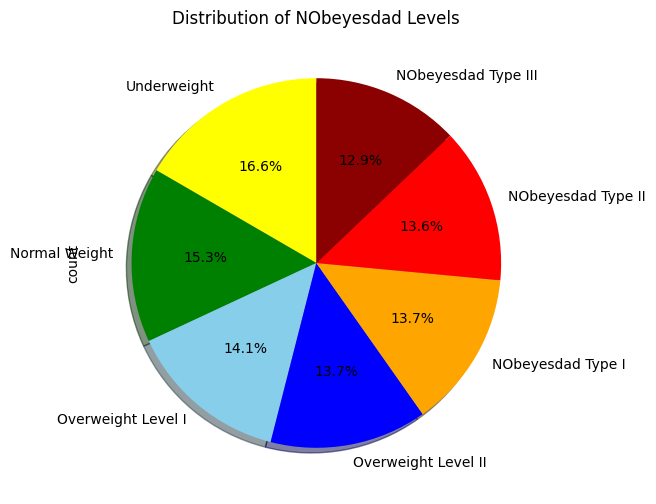

In [ ]:
# Count the values in 'NObeyesdad' and print them
print(df_drop.NObeyesdad.value_counts())
print(" ")

# Visualization of NObeyesdad Levels Column
df_drop['NObeyesdad'].value_counts().plot(
    kind='pie',
    figsize=(15, 6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    labels=['Underweight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II', 'NObeyesdad Type I', 'NObeyesdad Type II', 'NObeyesdad Type III'],
    colors=['yellow', 'green', 'skyblue', 'blue', 'orange', 'red', 'darkred'],
    explode=[0, 0, 0, 0, 0, 0, 0]
)
plt.title("Distribution of NObeyesdad Levels")
plt.show()


Looking at the distribution of the NObeyesdad column, the values are relatively close to each other, ranging from 272 to 351 observations per class.
The dataset is reasonably balanced.

# ML Model Implementation


Following models have been used for predictions:-

**Logistic Regression Classifier**

**SVM (Support Vector Machine)**

**Naive Bayes**

**Decision Tree**

**KNN (K-Nearest Neighbours)**

**Random Forest Classifier**

# Model Training

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

**Accuracy: Correct predictions / Total predictions**
*   Good if classes are balanced,
 Misleading if classes are imbalanced

**Confusion Matrix: Table of Actual vs Predicted**
*   Helps calculate precision, recall, etc.

**Precision = True Positives / (True Positives + False Positives)**
*   Good when False Positives are costly (e.g., spam detection)

**Recall = True Positives / (True Positives + False Negatives)**
*   Good when False Negatives are risky (e.g., disease detection)

**F1 Score = 2 * (Precision * Recall) / (Precision + Recall)**
*   Balance between precision and recall


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Container to store results
model_results = []

# Function to collect evaluation metrics (without ROC AUC)
def collect_metrics(model_name, y_train, y_train_pred,
                    y_test, y_test_pred):
    results = {
        "model": model_name,
        "train_accuracy": accuracy_score(y_train, y_train_pred),
        "test_accuracy": accuracy_score(y_test, y_test_pred),
        "train_precision": precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
        "test_precision": precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
        "train_recall": recall_score(y_train, y_train_pred, average='weighted'),
        "test_recall": recall_score(y_test, y_test_pred, average='weighted'),
        "train_f1": f1_score(y_train, y_train_pred, average='weighted'),
        "test_f1": f1_score(y_test, y_test_pred, average='weighted')
    }
    model_results.append(results)

# **Logistic Regression**

* Predicts class probabilities using a linear decision boundary with a sigmoid function.


Performance on Validation Data:
Confusion Matrix:
 [[30  6  0  0  7  0  0]
 [ 5 34  5  0  0  0  0]
 [ 0  6 35  3  0  0  0]
 [ 0  0  4 43  0  5  0]
 [ 3  0  0  0 38  0  0]
 [ 0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1 47]]
Accuracy: 0.8575949367088608
Precision: 0.8589241310945681
Recall: 0.8575949367088608
F1-score: 0.8564801699394401

Performance on Test Data:
Confusion Matrix:
 [[29  6  0  0  8  0  0]
 [ 0 41  2  0  0  0  0]
 [ 0  7 35  1  0  0  0]
 [ 0  0  3 46  0  4  0]
 [ 0  0  0  0 41  0  0]
 [ 0  0  0  0  0 44  1]
 [ 0  0  0  0  0  0 49]]
Accuracy: 0.8990536277602523
Precision: 0.910793725623532
Recall: 0.8990536277602523
F1-score: 0.8973366429516298

Validation Accuracy: 0.8576
Test Accuracy: 0.8991

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.67      0.81        43
           1       0.76      0.95      0.85        43
           2       0.88      0.81      0.84        43
           3       0.98      0.

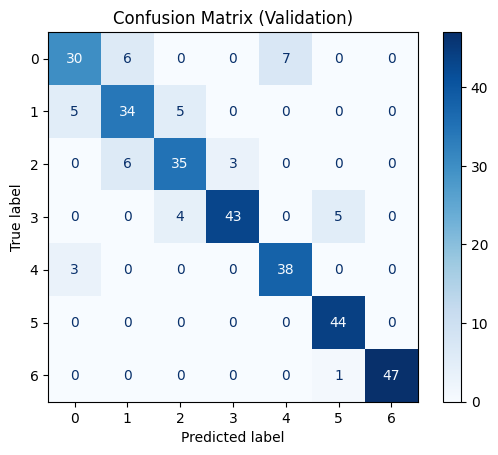

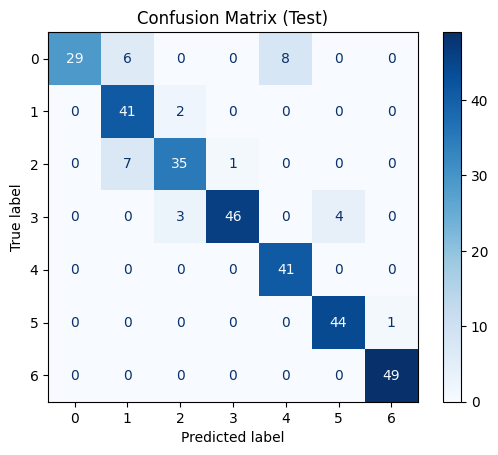

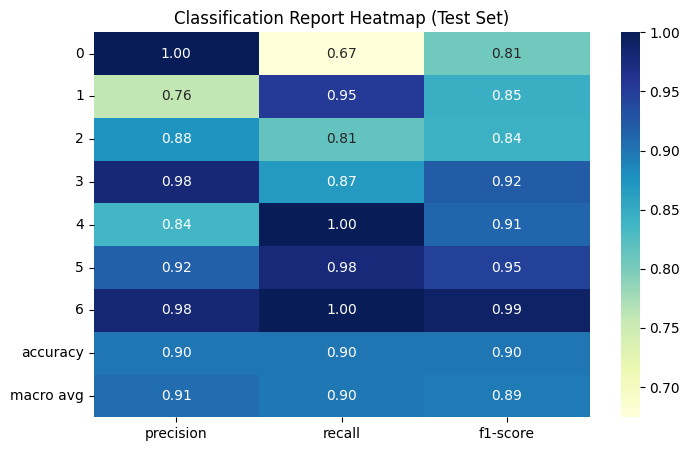

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1477, random_state=42, class_weight="balanced")
log_reg.fit(X_train, y_train)

y_val_pred = log_reg.predict(X_val)
y_test_pred = log_reg.predict(X_test)

def evaluate_performance(y_true, y_pred, dataset_name):
    print(f"\nPerformance on {dataset_name} Data:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))

evaluate_performance(y_val, y_val_pred, "Validation")
evaluate_performance(y_test, y_test_pred, "Test")
print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

def plot_confusion_matrix(y_true, y_pred, dataset_name):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    disp.ax_.set_title(f'Confusion Matrix ({dataset_name})')
    plt.grid(False)
    plt.show()

plot_confusion_matrix(y_val, y_val_pred, "Validation")
plot_confusion_matrix(y_test, y_test_pred, "Test")



# Classification report as heatmap
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap (Test Set)")
plt.show()

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)


# Collect metrics
collect_metrics("Logistic Regression", y_train, y_train_pred, y_test, y_test_pred)

# **SVM (Guassian Kernel Function (RBF))**

* Finds the best hyperplane that separates classes with maximum margin.


Performance on Validation Data:
Confusion Matrix:
 [[34  5  1  0  3  0  0]
 [ 9 29  6  0  0  0  0]
 [ 6  3 35  0  0  0  0]
 [ 1  0  5 41  0  5  0]
 [ 4  0  0  0 37  0  0]
 [ 0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1 47]]
Accuracy: 0.8417721518987342
Precision: 0.8532457837570665
Recall: 0.8417721518987342
F1-score: 0.8433482839202519

Performance on Test Data:
Confusion Matrix:
 [[32  3  0  0  8  0  0]
 [ 3 36  4  0  0  0  0]
 [ 3  4 34  2  0  0  0]
 [ 2  1  4 45  0  1  0]
 [ 3  0  0  0 38  0  0]
 [ 0  0  1  1  0 42  1]
 [ 0  0  0  0  0  0 49]]
Accuracy: 0.8706624605678234
Precision: 0.8729096901302918
Recall: 0.8706624605678234
F1-score: 0.87094516587523

Validation Accuracy: 0.8418
Test Accuracy: 0.8707

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        43
           1       0.82      0.84      0.83        43
           2       0.79      0.79      0.79        43
           3       0.94      0.8

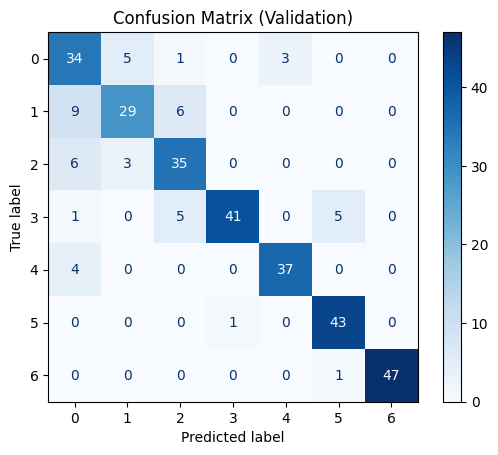

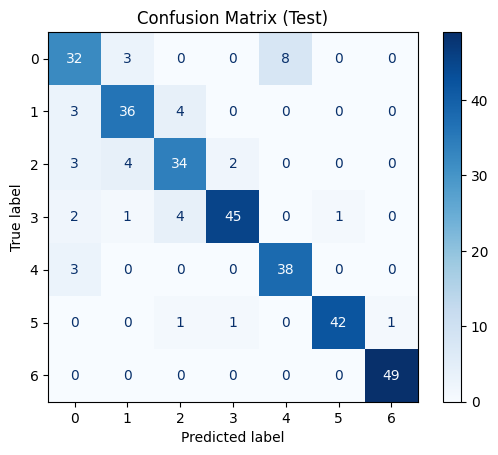

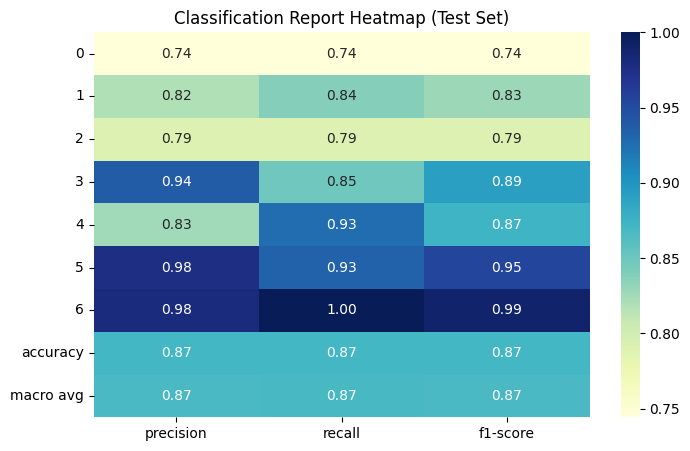

In [ ]:
from sklearn.svm import SVC

# Step 1: Train SVM Classifier with rbf Kernel
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Step 2: Predictions
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Step 3: Evaluation Function
def evaluate_performance(y_true, y_pred, dataset_name):
    print(f"\nPerformance on {dataset_name} Data:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))

evaluate_performance(y_val, y_val_pred, "Validation")
evaluate_performance(y_test, y_test_pred, "Test")

print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Step 4: Confusion Matrix Plots
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    disp.ax_.set_title(f'Confusion Matrix ({dataset_name})')
    plt.grid(False)
    plt.show()

plot_confusion_matrix(y_val, y_val_pred, "Validation")
plot_confusion_matrix(y_test, y_test_pred, "Test")

# Step 5: Classification Report as Heatmap
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap (Test Set)")
plt.show()
# Get predictions on training set
y_train_pred = svm_model.predict(X_train)

# Collect metrics for SVM (without ROC AUC)
collect_metrics("SVM (RBF Kernel)", y_train, y_train_pred, y_test, y_test_pred)

# **Naive Bayes Classifier**

* Uses Baye's Theorem with an assumption of feature independence.



Performance on Validation Data:
Confusion Matrix:
 [[23  0  3  0 12  0  5]
 [ 5  7 24  0  0  0  8]
 [ 2  1 40  0  0  0  1]
 [ 1  0 10 12  0 25  4]
 [ 3  0  0  0 31  0  7]
 [ 0  0  0  0  0 44  0]
 [ 0  0  0  1  0  0 47]]
Accuracy: 0.6455696202531646
Precision: 0.7196038671961086
Recall: 0.6455696202531646
F1-score: 0.59478723453463

Performance on Test Data:
Confusion Matrix:
 [[28  0  0  0 13  0  2]
 [ 2  9 25  0  0  0  7]
 [ 2  0 41  0  0  0  0]
 [ 2  0 10 13  0 22  6]
 [ 1  0  0  0 36  0  4]
 [ 1  0  0  1  0 42  1]
 [ 0  0  0  0  0  0 49]]
Accuracy: 0.6876971608832808
Precision: 0.7675296498695583
Recall: 0.6876971608832808
F1-score: 0.6427030241627576

Validation Accuracy: 0.6456
Test Accuracy: 0.6877

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.78      0.65      0.71        43
           1       1.00      0.21      0.35        43
           2       0.54      0.95      0.69        43
           3       0.93      0.2

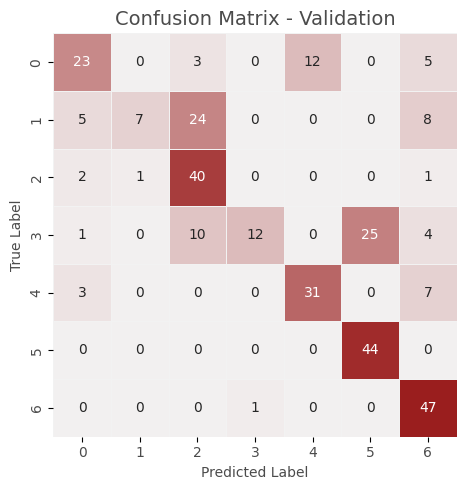

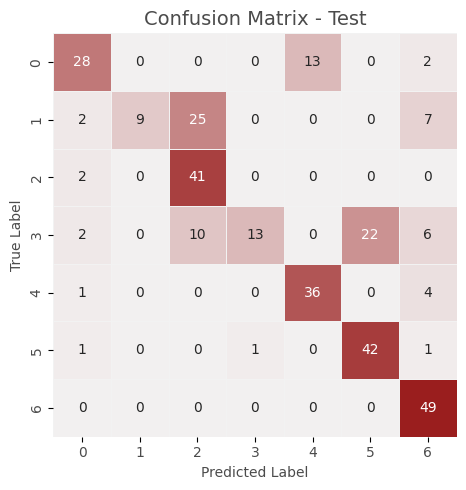

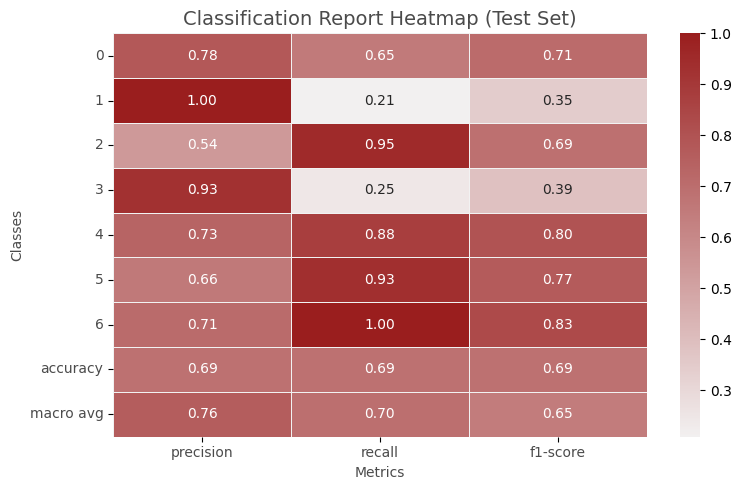

In [ ]:
from sklearn.naive_bayes import GaussianNB

official_color = "#9A1E1E"  # IIT Dharwad deep red
neutral_color = "#F2F2F2"
text_color = "#4B4B4B"

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predictions
y_val_pred = nb.predict(X_val_scaled)
y_test_pred = nb.predict(X_test_scaled)

# Evaluation function
def evaluate_performance(y_true, y_pred, dataset_name):
    print(f"\nPerformance on {dataset_name} Data:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))

# Evaluate
evaluate_performance(y_val, y_val_pred, "Validation")
evaluate_performance(y_test, y_test_pred, "Test")

print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Custom confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.light_palette(official_color, as_cmap=True),
                cbar=False, square=True, linewidths=0.5, linecolor=neutral_color)
    plt.title(f"Confusion Matrix - {dataset_name}", fontsize=14, color=text_color)
    plt.xlabel("Predicted Label", color=text_color)
    plt.ylabel("True Label", color=text_color)
    plt.xticks(color=text_color)
    plt.yticks(color=text_color)
    plt.tight_layout()
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(y_val, y_val_pred, "Validation")
plot_confusion_matrix(y_test, y_test_pred, "Test")

# Classification report heatmap
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=sns.light_palette(official_color, as_cmap=True),
            fmt=".2f", linewidths=0.5, linecolor=neutral_color)
plt.title("Classification Report Heatmap (Test Set)", fontsize=14, color=text_color)
plt.xlabel("Metrics", color=text_color)
plt.ylabel("Classes", color=text_color)
plt.xticks(color=text_color)
plt.yticks(color=text_color)
plt.tight_layout()
plt.show()

# Get predictions on training set for Naive Bayes
y_train_pred = nb.predict(X_train_scaled)
collect_metrics("Naive Bayes", y_train, y_train_pred, y_test, y_test_pred)

# **Decision Tree**

* Splits data based on feature values to create a tree of decisions.


Performance on Validation Data:
Confusion Matrix:
 [[42  1  0  0  0  0  0]
 [ 1 42  1  0  0  0  0]
 [ 0  0 44  0  0  0  0]
 [ 0  0  1 49  0  2  0]
 [ 1  0  0  0 40  0  0]
 [ 0  0  0  2  0 42  0]
 [ 0  0  0  0  0  0 48]]
Accuracy: 0.9715189873417721
Precision: 0.9717403150853344
Recall: 0.9715189873417721
F1-score: 0.9714929668925817

Performance on Test Data:
Confusion Matrix:
 [[41  2  0  0  0  0  0]
 [ 0 41  2  0  0  0  0]
 [ 0  0 42  1  0  0  0]
 [ 0  0  2 49  0  2  0]
 [ 0  0  0  0 41  0  0]
 [ 0  0  0  3  0 41  1]
 [ 0  0  0  0  0  0 49]]
Accuracy: 0.9589905362776026
Precision: 0.9595831113861307
Recall: 0.9589905362776026
F1-score: 0.9589821098611372

Validation Accuracy: 0.9715
Test Accuracy: 0.9590

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.95      0.95      0.95        43
           2       0.91      0.98      0.94        43
           3       0.92      0

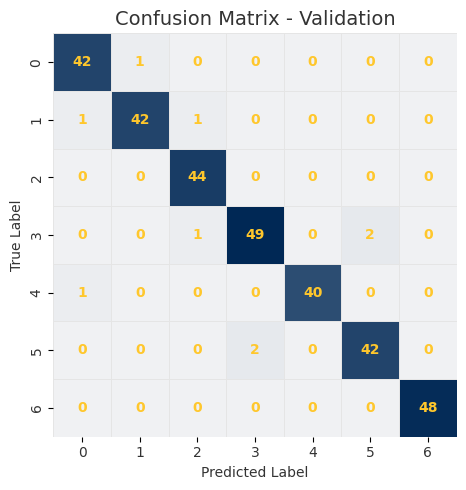

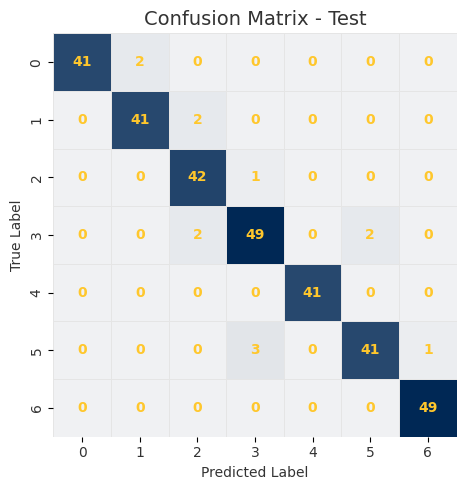

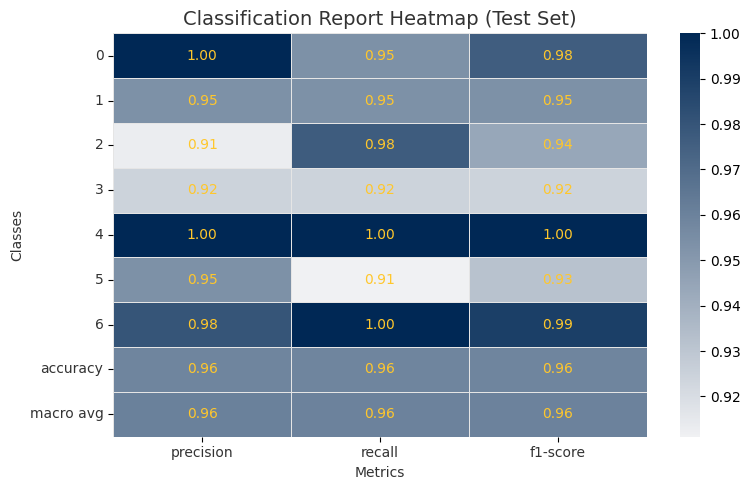

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Define official alternate color palette
official_blue = "#002855"  # deep academic blue
highlight_gold = "#FFC72C"  # annotation/highlight
grid_color = "#E5E5E5"
text_color = "#333333"

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight="balanced")
dt.fit(X_train_scaled, y_train)

# Predictions
y_val_pred = dt.predict(X_val_scaled)
y_test_pred = dt.predict(X_test_scaled)

# Evaluation function
def evaluate_performance(y_true, y_pred, dataset_name):
    print(f"\nPerformance on {dataset_name} Data:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))

# Evaluate
evaluate_performance(y_val, y_val_pred, "Validation")
evaluate_performance(y_test, y_test_pred, "Test")

print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.light_palette(official_blue, as_cmap=True),
                cbar=False, linewidths=0.6, linecolor=grid_color, square=True,
                annot_kws={"color": highlight_gold, "weight": "bold"})
    plt.title(f"Confusion Matrix - {dataset_name}", fontsize=14, color=text_color)
    plt.xlabel("Predicted Label", color=text_color)
    plt.ylabel("True Label", color=text_color)
    plt.xticks(color=text_color)
    plt.yticks(color=text_color)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_val, y_val_pred, "Validation")
plot_confusion_matrix(y_test, y_test_pred, "Test")

# Classification Report Heatmap
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True,
            cmap=sns.light_palette(official_blue, as_cmap=True),
            fmt=".2f", linewidths=0.5, linecolor=grid_color,
            annot_kws={"color": highlight_gold})
plt.title("Classification Report Heatmap (Test Set)", fontsize=14, color=text_color)
plt.xlabel("Metrics", color=text_color)
plt.ylabel("Classes", color=text_color)
plt.xticks(color=text_color)
plt.yticks(color=text_color)
plt.tight_layout()
plt.show()
# Get predictions on training set for Decision Tree
y_train_pred = dt.predict(X_train)
collect_metrics("Decision Tree", y_train, y_train_pred, y_test, y_test_pred)


# **KNN**

* Classifies based on the majority class among the k nearest data points.


Performance on Validation Data:
Confusion Matrix:
 [[28  5  7  0  3  0  0]
 [10 29  4  0  1  0  0]
 [ 4  4 34  0  2  0  0]
 [ 1  0  6 42  0  3  0]
 [ 5  1  0  0 35  0  0]
 [ 0  0  1  1  0 42  0]
 [ 0  0  1  0  0  0 47]]
Accuracy: 0.8132911392405063
Precision: 0.8255856376161612
Recall: 0.8132911392405063
F1-score: 0.8166318396716922

Performance on Test Data:
Confusion Matrix:
 [[32  4  1  0  6  0  0]
 [ 5 38  0  0  0  0  0]
 [ 3  4 35  1  0  0  0]
 [ 2  2  2 45  0  2  0]
 [ 4  0  0  0 37  0  0]
 [ 2  0  0  0  0 42  1]
 [ 0  0  0  0  0  0 49]]
Accuracy: 0.8769716088328076
Precision: 0.8845900246062205
Recall: 0.8769716088328076
F1-score: 0.8788396416381152

Validation Accuracy: 0.8133
Test Accuracy: 0.8770

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.67      0.74      0.70        43
           1       0.79      0.88      0.84        43
           2       0.92      0.81      0.86        43
           3       0.98      0

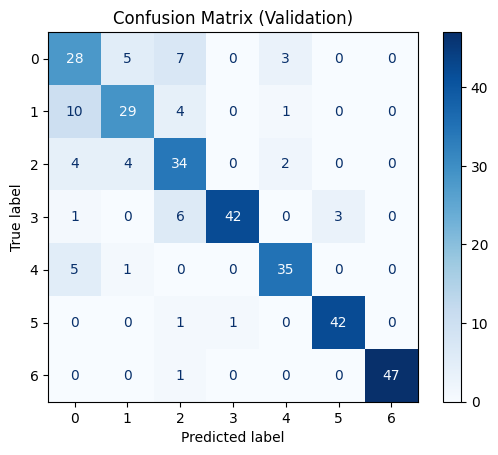

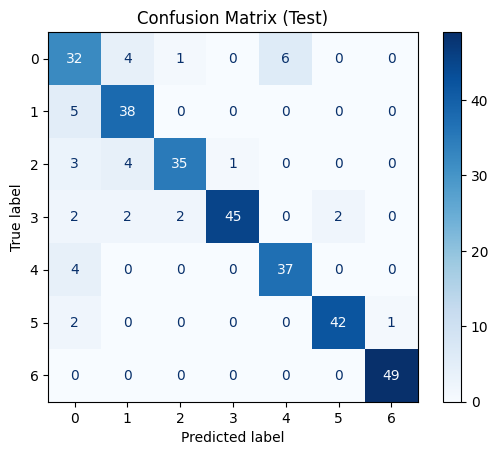

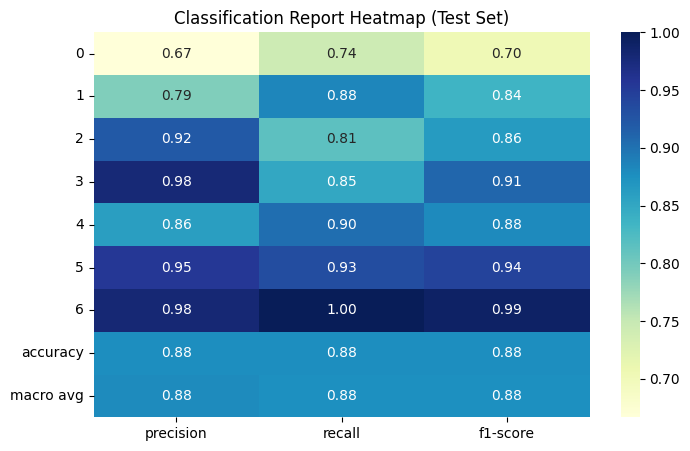

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
# Step 1: Train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

# Step 2: Predictions
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

# Step 3: Evaluation Function
def evaluate_performance(y_true, y_pred, dataset_name):
    print(f"\nPerformance on {dataset_name} Data:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))

evaluate_performance(y_val, y_val_pred, "Validation")
evaluate_performance(y_test, y_test_pred, "Test")

print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Step 4: Confusion Matrix Plots
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues')
    disp.ax_.set_title(f'Confusion Matrix ({dataset_name})')
    plt.grid(False)
    plt.show()

plot_confusion_matrix(y_val, y_val_pred, "Validation")
plot_confusion_matrix(y_test, y_test_pred, "Test")

# Step 5: Classification Report as Heatmap
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap (Test Set)")
plt.show()
# Get predictions on training set for KNN
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Collect metrics
collect_metrics("K-Nearest Neighbors", y_train, y_train_pred, y_test, y_test_pred)


# **Random Forest Classifier**

* An ensemble of decision trees for more accurate and robust predictions.



Performance on Validation Data:
Confusion Matrix:
 [[42  0  0  0  1  0  0]
 [ 4 39  1  0  0  0  0]
 [ 0  2 41  1  0  0  0]
 [ 0  0  2 48  0  2  0]
 [ 0  0  0  0 41  0  0]
 [ 0  0  0  2  0 42  0]
 [ 0  0  0  1  0  0 47]]
Accuracy: 0.9493670886075949
Precision: 0.9498048659038363
Recall: 0.9493670886075949
F1-score: 0.9492452569292641

Performance on Test Data:
Confusion Matrix:
 [[42  0  0  0  1  0  0]
 [ 1 42  0  0  0  0  0]
 [ 0  1 42  0  0  0  0]
 [ 0  0  0 52  0  1  0]
 [ 0  0  0  0 41  0  0]
 [ 0  0  0  0  0 44  1]
 [ 0  0  0  0  0  0 49]]
Accuracy: 0.9842271293375394
Precision: 0.9843653297281056
Recall: 0.9842271293375394
F1-score: 0.9842284868887476

Validation Accuracy: 0.9494
Test Accuracy: 0.9842

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.98      0.98      0.98        43
           2       1.00      0.98      0.99        43
           3       1.00      0

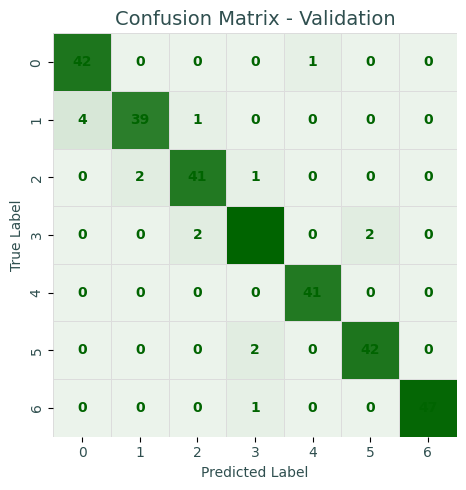

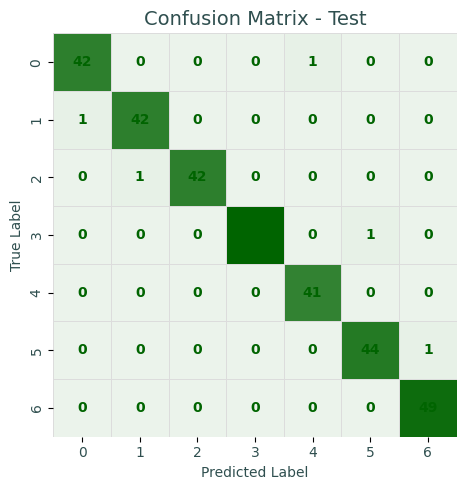

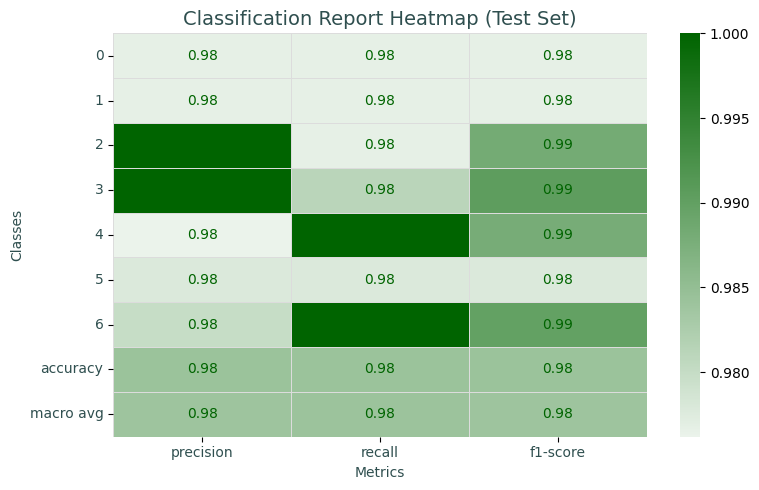

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Official colors
forest_green = "#006400"
highlight_yellow = "#FFFACD"
text_color = "#2F4F4F"
line_color = "#DCDCDC"

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf.fit(X_train_scaled, y_train)

# Predictions
y_val_pred = rf.predict(X_val_scaled)
y_test_pred = rf.predict(X_test_scaled)

# Evaluation function
def evaluate_performance(y_true, y_pred, dataset_name):
    print(f"\nPerformance on {dataset_name} Data:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1-score:", f1_score(y_true, y_pred, average='weighted'))

# Evaluate
evaluate_performance(y_val, y_val_pred, "Validation")
evaluate_performance(y_test, y_test_pred, "Test")

print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix Plot
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d",
                cmap=sns.light_palette(forest_green, as_cmap=True),
                cbar=False, linewidths=0.6, linecolor=line_color, square=True,
                annot_kws={"color": forest_green, "weight": "bold"})
    plt.title(f"Confusion Matrix - {dataset_name}", fontsize=14, color=text_color)
    plt.xlabel("Predicted Label", color=text_color)
    plt.ylabel("True Label", color=text_color)
    plt.xticks(color=text_color)
    plt.yticks(color=text_color)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_val, y_val_pred, "Validation")
plot_confusion_matrix(y_test, y_test_pred, "Test")

# Classification Report Heatmap
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True,
            cmap=sns.light_palette(forest_green, as_cmap=True),
            fmt=".2f", linewidths=0.5, linecolor=line_color,
            annot_kws={"color": forest_green})
plt.title("Classification Report Heatmap (Test Set)", fontsize=14, color=text_color)
plt.xlabel("Metrics", color=text_color)
plt.ylabel("Classes", color=text_color)
plt.xticks(color=text_color)
plt.yticks(color=text_color)
plt.tight_layout()
plt.show()

# Get predictions on training set for Random Forest
y_train_pred = rf.predict(X_train)

collect_metrics("Random Forest", y_train, y_train_pred, y_test, y_test_pred)


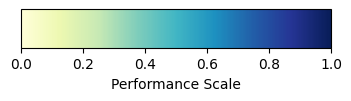

In [ ]:
results_df = pd.DataFrame(model_results)

# Only format float columns
numeric_cols = results_df.select_dtypes(include='number').columns

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the gradient range and color map
fig, ax = plt.subplots(figsize=(4, 0.5))
cmap = "YlGnBu"
norm = mcolors.Normalize(vmin=0, vmax=1)  # Adjust vmin and vmax according to your data range

# Create a color bar
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=ax, orientation="horizontal", label="Performance Scale"
)
plt.show()

# Display the styled dataframe as you already have
display(
    results_df.style
    .set_caption("Model Performance Comparison")
    .background_gradient(cmap="YlGnBu", subset=["test_accuracy", "test_f1"])
    .format({col: "{:.4f}" for col in numeric_cols})
    .set_table_styles([
        {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}
    ])
)


#**RandomForest/DescisionTree gave us the best test accuracy**

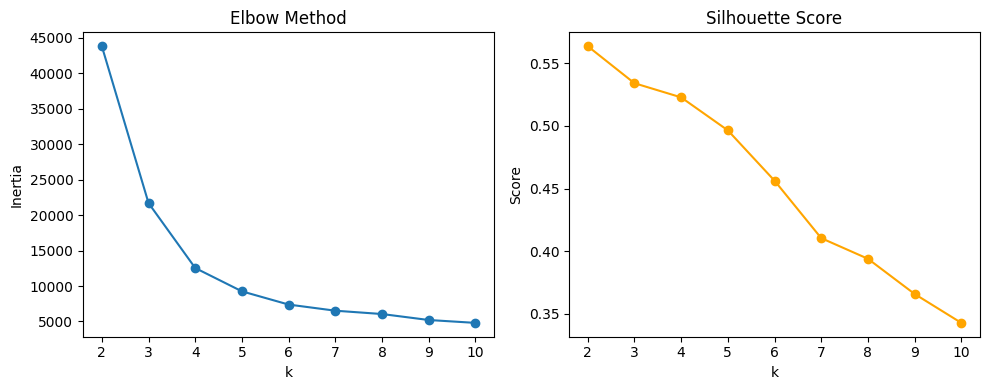

Best k based on Silhouette Score: 2 with score = 0.5636


In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Step 2: Elbow Method & Silhouette Score
inertias = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"Best k based on Silhouette Score: {best_k} with score = {best_score:.4f}")

In the elbow method, the optimal number of clusters is chosen as the point beyond which the rate of decrease of the within clusters sum of squares starts to fall significantly.

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def purity_score(y_true, y_pred):
    """Calculate purity score for clustering"""
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.max(cm, axis=0)) / np.sum(cm)
# K=2 , optimal k according to silhouette score
kmeans_2 = KMeans(n_clusters=2, random_state=42)
y_k2 = kmeans_2.fit_predict(X)
purity_k2 = purity_score(y, y_k2)
print(f"Purity for k=2: {purity_k2:.4f}")

# K=4 , optimal k according to Elbow method
kmeans_4 = KMeans(n_clusters=4, random_state=42)
y_k4 = kmeans_4.fit_predict(X)
purity_k4 = purity_score(y, y_k4)
print(f"Purity for k=4: {purity_k4:.4f}")


Purity for k=2: 0.2991
Purity for k=4: 0.5739


*  Between the Elbow Method (k=4) and Silhouette Score (k=2), we selected k=4 , due to its higher purity score (0.5739 vs. 0.2991), reflecting better alignment , with the actual obesity groupings.



Cluster-wise Mean Summary:
           Gender  family_history_with_overweight      FAVC      FCVC  \
Cluster                                                                 
0        0.566714                        0.794835  0.823529  2.291959   
1        0.193211                        1.000000  0.992167  2.908309   
2        0.717241                        0.986207  0.970690  2.262841   
3        0.404444                        0.480000  0.773333  2.399499   

              NCP       SCC       FAF  NObeyesdad  CAEC_Always  \
Cluster                                                          
0        2.525332  0.074605  1.023881    1.285509     0.031564   
1        2.924517  0.000000  0.696437    5.804178     0.000000   
2        2.583443  0.005172  1.005729    3.839655     0.013793   
3        2.861595  0.091111  1.260079    2.417778     0.051111   

         CAEC_Frequently  CAEC_Sometimes   CAEC_no  CALC_Frequently  \
Cluster                                                          

<ipython-input-134-21a5ef22f5d1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clustered, x="Cluster", palette="Set2")


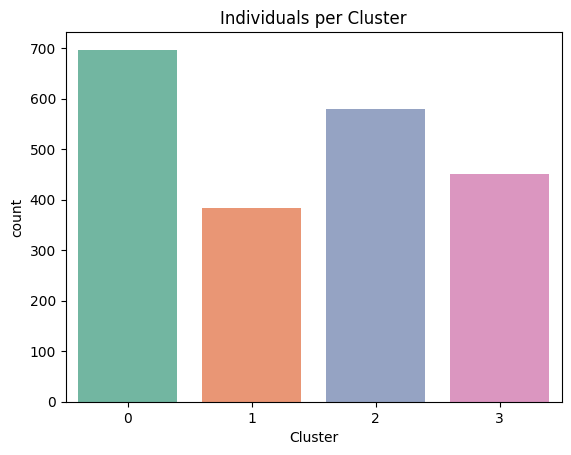

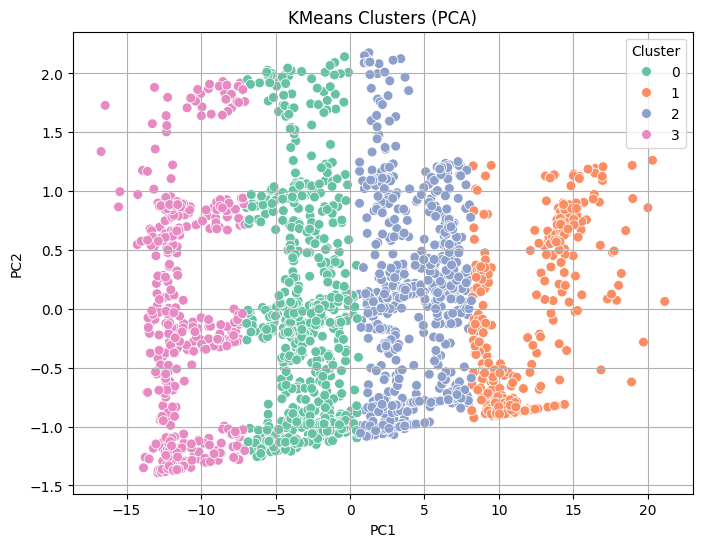


Obesity Class Distribution in Clusters:
NObeyesdad    0    1    2    3    4    5    6
Cluster                                      
0           109  290  288   10    0    0    0
1             0    0    0    0    0   75  308
2             0    0    2  341    0  222   15
3           178    0    0    0  272    0    0


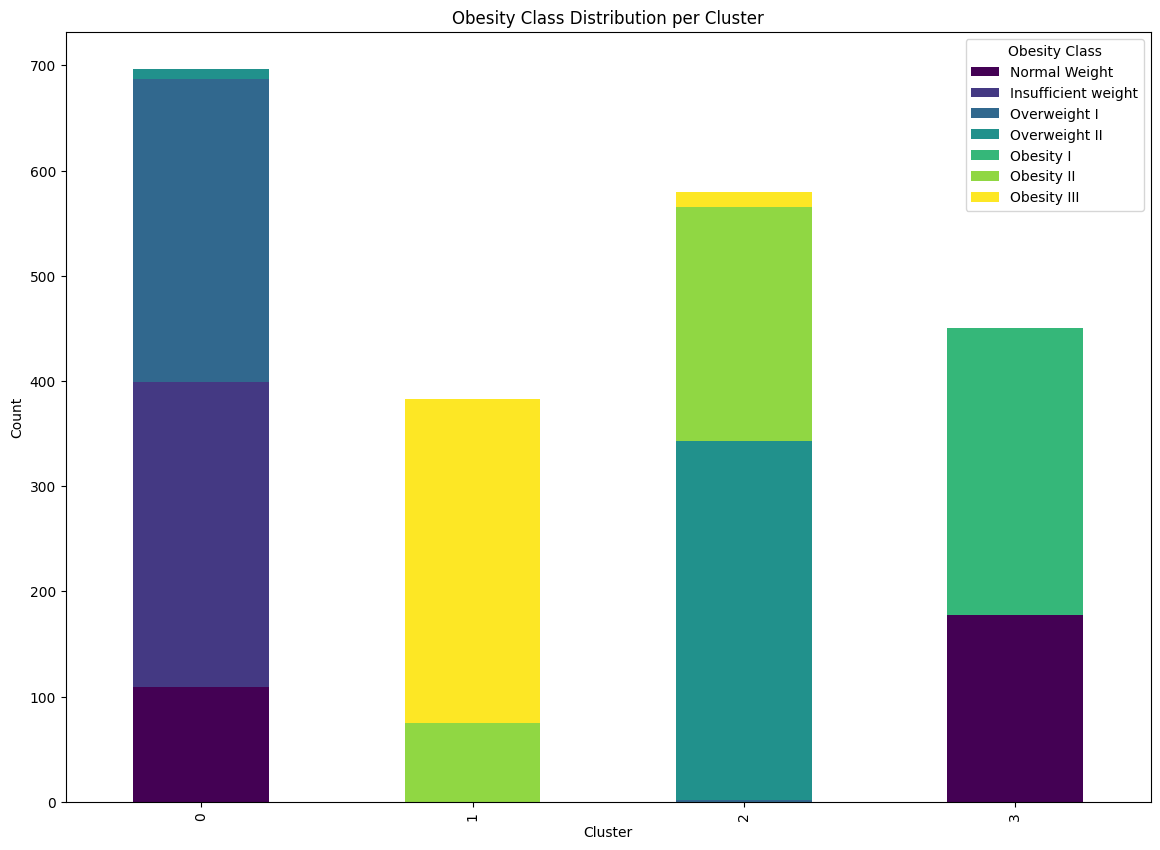

In [ ]:
df_clustered = df_drop.copy()
df_clustered["Cluster"] = y_k4

# Step 4: Cluster Summary
print("\nCluster-wise Mean Summary:")
print(df_clustered.groupby("Cluster").mean(numeric_only=True))

sns.countplot(data=df_clustered, x="Cluster", palette="Set2")
plt.title("Individuals per Cluster")
plt.show()

# Step 5: PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_k4, palette="Set2", s=50)
plt.title("KMeans Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


custom_labels = ["Normal Weight","Insufficient weight",  "Overweight I", "Overweight II", "Obesity I", "Obesity II", "Obesity III"]

# Step 6: Cluster vs Obesity Class
cross_tab = pd.crosstab(df_clustered["Cluster"], df_clustered["NObeyesdad"])
print("\nObesity Class Distribution in Clusters:")
print(cross_tab)

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(14, 10))
plt.title("Obesity Class Distribution per Cluster")
plt.ylabel("Count")
plt.legend(title="Obesity Class", labels=custom_labels, loc="best", fontsize=10)
plt.show()

In [ ]:
# from sklearn_extra.cluster import KMedoids

# # Step 1: Find optimal K using Silhouette Score
# silhouette_scores = []
# K_range = range(2, 11)
# for k in K_range:
#     kmedoids = KMedoids(n_clusters=k, random_state=42)
#     kmedoids.fit(X)
#     silhouette_scores.append(silhouette_score(X, kmedoids.labels_))

# plt.figure(figsize=(6, 4))
# plt.plot(K_range, silhouette_scores, marker='o', color='orange')
# plt.title("Silhouette Score (K-Medoids)")
# plt.xlabel("k")
# plt.ylabel("Score")
# plt.grid(True)
# plt.show()

# **Agglomerative Clustering**

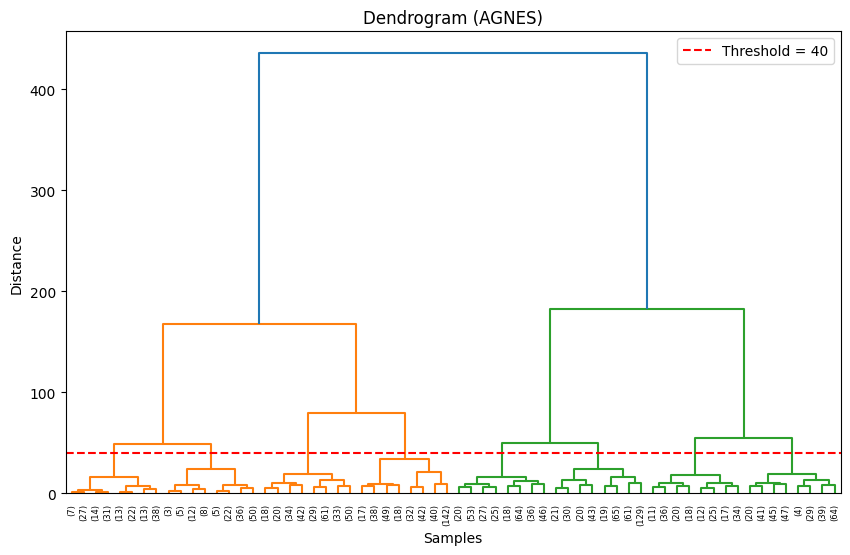

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Dendrogram
linked = linkage(X , method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (AGNES)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.axhline(y=40, color='r', linestyle='--', label="Threshold = 40")
plt.legend()
plt.show()



AGNES Purity Score: 0.8834


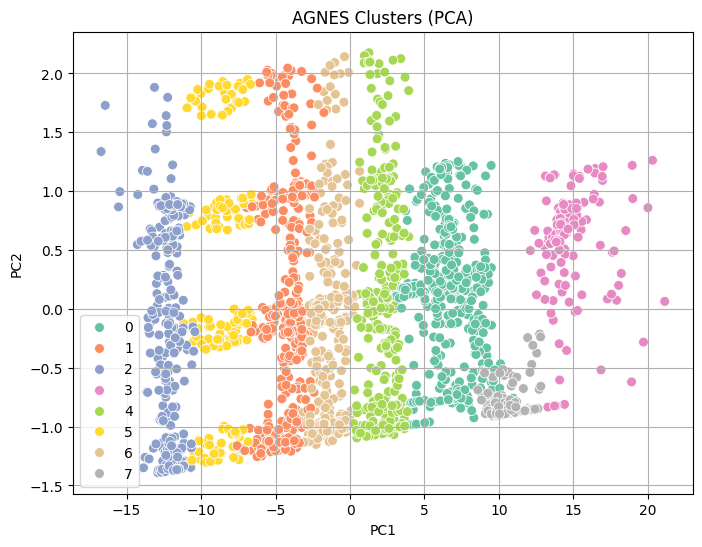


AGNES Cluster-wise Mean Summary:
           Gender  family_history_with_overweight      FAVC      FCVC  \
Cluster                                                                 
0        0.936508                        0.994709  0.970899  2.373997   
1        0.554124                        0.708763  0.868557  2.290010   
2        0.377163                        0.470588  0.813149  2.459427   
3        0.000000                        1.000000  1.000000  3.000000   
4        0.473868                        0.979094  0.972125  2.199108   
5        0.473988                        0.491329  0.699422  2.293374   
6        0.591696                        0.920415  0.761246  2.287312   
7        0.000000                        1.000000  1.000000  3.000000   

              NCP       SCC       FAF  NObeyesdad  CAEC_Always  \
Cluster                                                          
0        2.723366  0.005291  0.900261    4.708995     0.013228   
1        2.559660  0.121134  1.140031

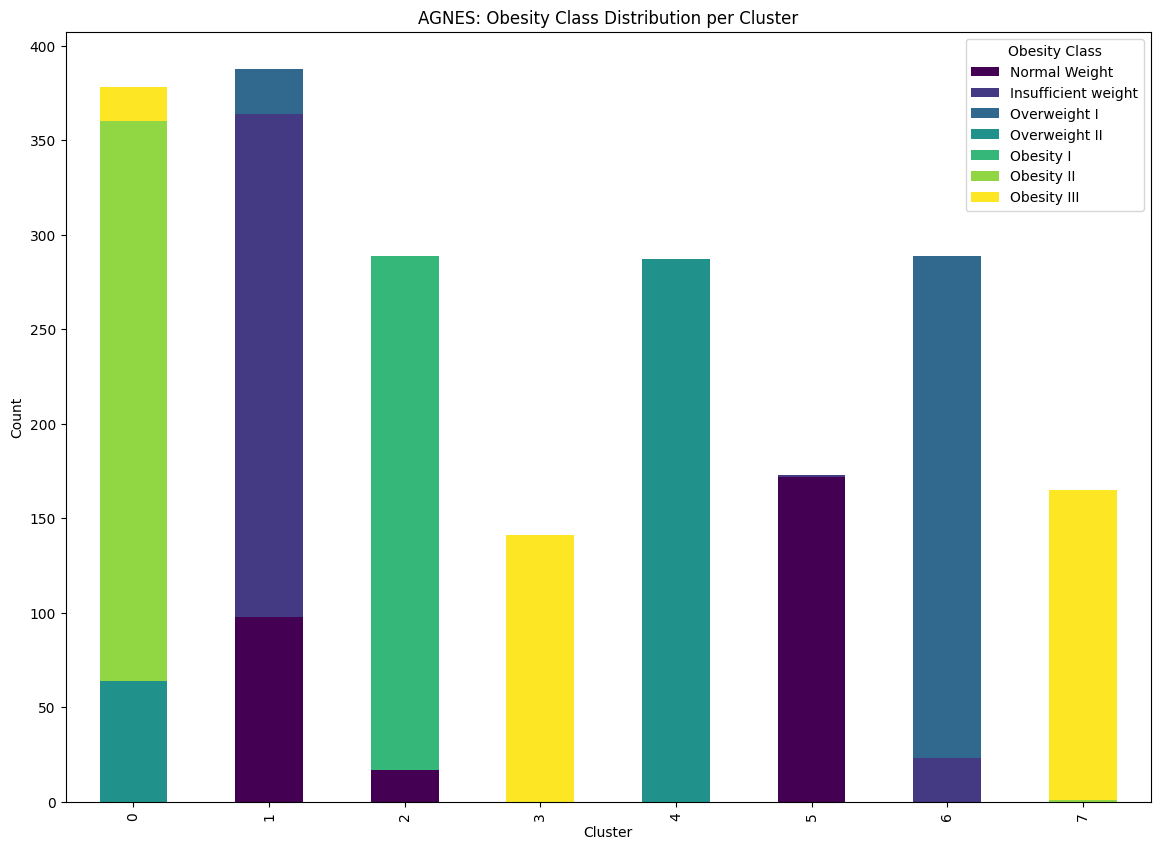

In [ ]:
# Apply AGNES
agnes = AgglomerativeClustering(n_clusters=8, linkage='ward')
y_agnes = agnes.fit_predict(X)

# Purity Score
purity_agnes = purity_score(y, y_agnes)
print(f"AGNES Purity Score: {purity_agnes:.4f}")

# PCA Visualization
X_pca = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_agnes, palette="Set2", s=50)
plt.title("AGNES Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Cluster-wise analysis
df_agnes = df_drop.copy()
df_agnes["Cluster"] = y_agnes

print("\nAGNES Cluster-wise Mean Summary:")
print(df_agnes.groupby("Cluster").mean(numeric_only=True))

cross_tab_agnes = pd.crosstab(df_agnes["Cluster"], df_agnes["NObeyesdad"])
print("\nAGNES Obesity Class Distribution in Clusters:")
print(cross_tab_agnes)

custom_labels = ["Normal Weight","Insufficient weight",  "Overweight I", "Overweight II", "Obesity I", "Obesity II", "Obesity III"]
cross_tab_agnes.plot(kind="bar", stacked=True, colormap="viridis", figsize=(14, 10))
plt.title("AGNES: Obesity Class Distribution per Cluster")
plt.ylabel("Count")
plt.legend(title="Obesity Class", labels=custom_labels, loc="best", fontsize=10)
plt.show()


# **Divisive Clustering**

DIANA Purity Score (simulated): 0.5739


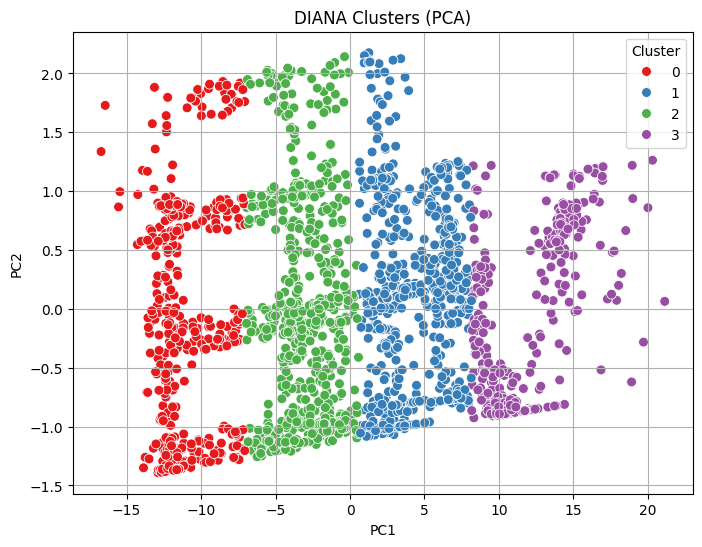


 DIANA Cluster-wise Mean Summary:
         Gender  family_history_with_overweight  FAVC  FCVC   NCP   SCC   FAF  \
Cluster                                                                         
0          0.40                            0.48  0.77  2.40  2.86  0.09  1.26   
1          0.72                            0.99  0.97  2.26  2.58  0.01  1.01   
2          0.57                            0.79  0.82  2.29  2.53  0.07  1.02   
3          0.19                            1.00  0.99  2.91  2.92  0.00  0.70   

         NObeyesdad  CAEC_Always  CAEC_Frequently  CAEC_Sometimes  CAEC_no  \
Cluster                                                                      
0              2.42         0.05             0.39            0.54     0.02   
1              3.84         0.01             0.01            0.97     0.00   
2              1.29         0.03             0.09            0.83     0.06   
3              5.80         0.00             0.00            1.00     0.00   

         

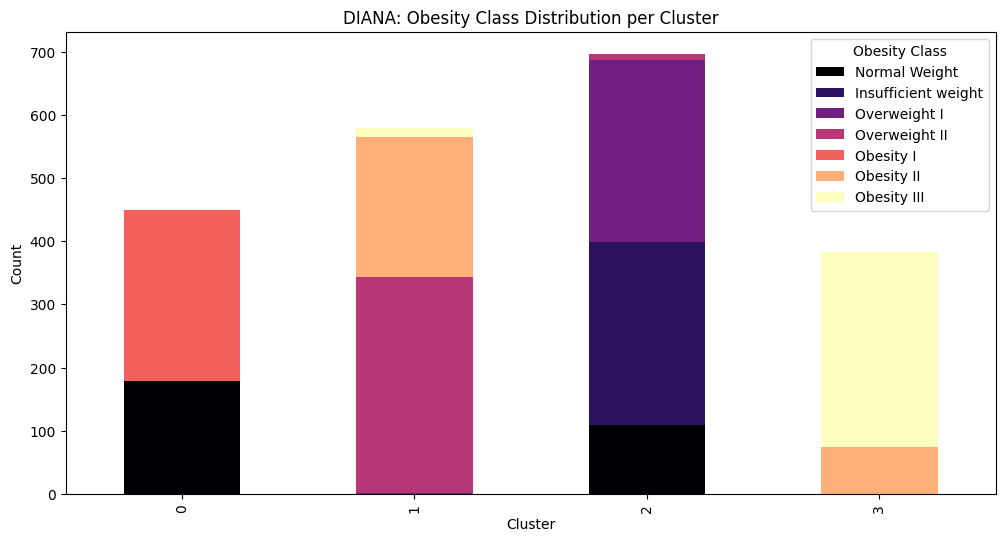

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Purity score
def purity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.sum(np.max(cm, axis=0)) / np.sum(cm)

# Fixed bisecting KMeans (DIANA-style) with type handling
def bisecting_kmeans(X, max_clusters=4):
    n_samples = X.shape[0]
    labels = np.zeros(n_samples, dtype=int)

    clusters = [(np.arange(n_samples), 0)]  # (indices, cluster_label)
    current_label = 1

    while len(clusters) < max_clusters:
        # Find largest cluster
        cluster_lengths = [len(indices) for indices, _ in clusters]
        i = np.argmax(cluster_lengths)

        idx_to_split, base_label = clusters.pop(i)

        # Handle both DataFrame and ndarray
        if isinstance(X, pd.DataFrame):
            data_to_split = X.iloc[idx_to_split].values
        else:
            data_to_split = X[idx_to_split]

        # Split using KMeans
        kmeans = KMeans(n_clusters=2, random_state=42).fit(data_to_split)
        split_labels = kmeans.labels_

        # New indices for split clusters
        idx_0 = idx_to_split[split_labels == 0]
        idx_1 = idx_to_split[split_labels == 1]

        # Update labels in main array
        labels[idx_0] = base_label
        labels[idx_1] = current_label

        # Update cluster list
        clusters.append((idx_0, base_label))
        clusters.append((idx_1, current_label))
        current_label += 1

    return labels

# Run clustering
y_diana = bisecting_kmeans(X, max_clusters=4)

# Purity score
purity_diana = purity_score(y, y_diana)
print(f"DIANA Purity Score (simulated): {purity_diana:.4f}")

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X if isinstance(X, np.ndarray) else X.values)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_diana, palette="Set1", s=50)
plt.title("DIANA Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

# Cluster-wise analysis
df_diana = df_drop.copy()
df_diana["Cluster"] = y_diana

print("\n DIANA Cluster-wise Mean Summary:")
print(df_diana.groupby("Cluster").mean(numeric_only=True).round(2))

# Obesity class distribution
cross_tab_diana = pd.crosstab(df_diana["Cluster"], df_diana["NObeyesdad"])
print("\n DIANA Obesity Class Distribution in Clusters:")
print(cross_tab_diana)

# Plot distribution
cross_tab_diana.plot(kind="bar", stacked=True, colormap="magma", figsize=(12, 6))
plt.title("DIANA: Obesity Class Distribution per Cluster")
plt.ylabel("Count")
custom_labels = ["Normal Weight","Insufficient weight",  "Overweight I", "Overweight II", "Obesity I", "Obesity II", "Obesity III"]
plt.legend(title="Obesity Class", labels=custom_labels, loc="best", fontsize=10)
plt.show()


# **DBSCAN**

DBSCAN found 3 clusters and 234 noise points
DBSCAN Purity Score: 0.3204


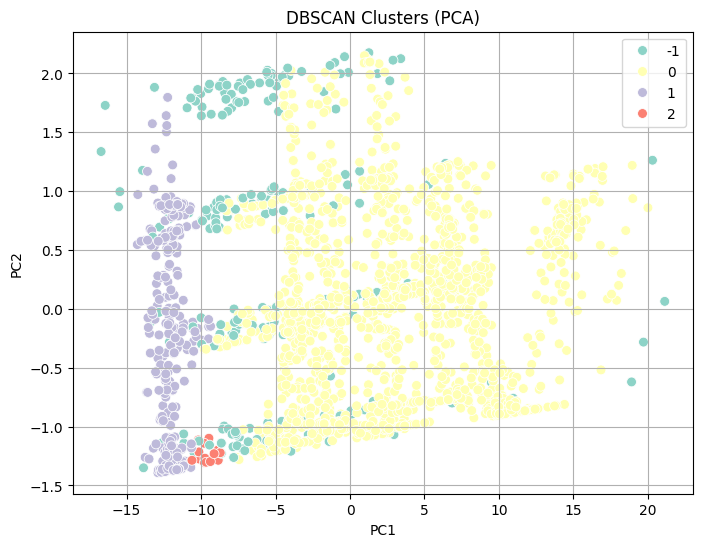


DBSCAN Cluster-wise Mean Summary (excluding noise):
           Gender  family_history_with_overweight      FAVC      FCVC  \
Cluster                                                                 
0        0.520253                        0.913924  0.943038  2.417522   
1        0.379433                        0.475177  0.840426  2.432695   
2        0.214286                        0.285714  0.928571  2.142857   

              NCP       SCC       FAF  NObeyesdad  CAEC_Always  \
Cluster                                                          
0        2.628765  0.018987  0.910040    3.264557     0.007595   
1        2.864585  0.042553  1.191418    3.560284     0.007092   
2        2.928571  0.000000  0.000000    0.000000     0.071429   

         CAEC_Frequently  CAEC_Sometimes   CAEC_no  CALC_Frequently  \
Cluster                                                               
0               0.034177        0.936076  0.022152         0.020253   
1               0.439716        0.549

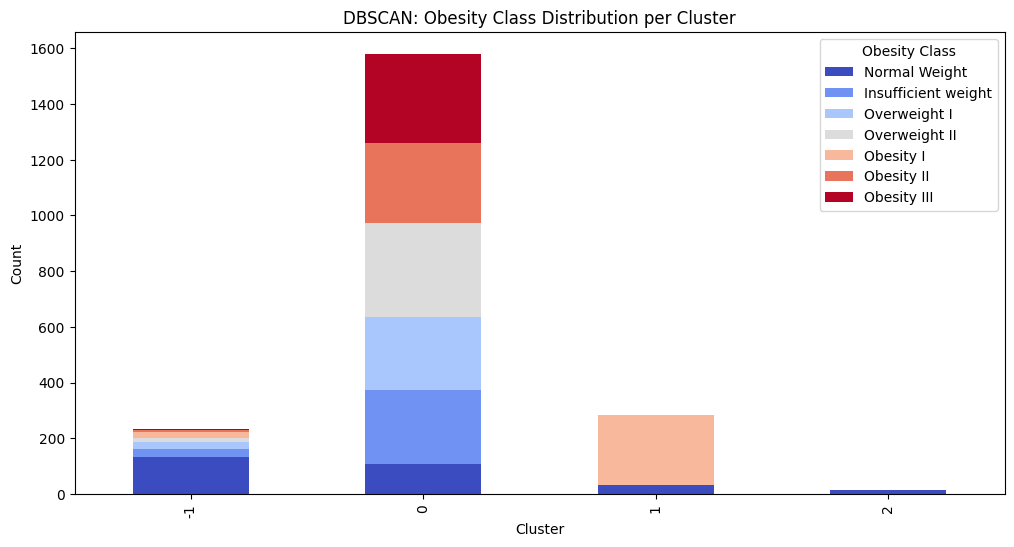

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=1.05, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Count clusters
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")

# Purity and silhouette (exclude noise)
mask = y_dbscan != -1
if n_clusters > 1:
    purity_dbscan = purity_score(np.array(y)[mask], y_dbscan[mask])
    print(f"DBSCAN Purity Score: {purity_dbscan:.4f}")
else:
    print("DBSCAN couldn't find multiple clusters. Skipping purity.")

# PCA Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_dbscan, palette="Set3", s=50)
plt.title("DBSCAN Clusters (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Cluster-wise analysis
df_dbscan = df_drop.copy()
df_dbscan["Cluster"] = y_dbscan

print("\nDBSCAN Cluster-wise Mean Summary (excluding noise):")
print(df_dbscan[df_dbscan["Cluster"] != -1].groupby("Cluster").mean(numeric_only=True))

cross_tab_dbscan = pd.crosstab(df_dbscan["Cluster"], df_dbscan["NObeyesdad"])
print("\nDBSCAN Obesity Class Distribution in Clusters:")
print(cross_tab_dbscan)

cross_tab_dbscan.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))
plt.title("DBSCAN: Obesity Class Distribution per Cluster")
plt.ylabel("Count")
custom_labels = ["Normal Weight","Insufficient weight",  "Overweight I", "Overweight II", "Obesity I", "Obesity II", "Obesity III"]
plt.legend(title="Obesity Class", labels=custom_labels, loc="best", fontsize=10)
plt.show()


# **Due to the dense nature of the data, DBSCAN is not an efficient choice for identifying meaningful clusters**
  